<a href="https://colab.research.google.com/github/shofwatunniswah/Sentiment-Analysis-of-Glory-Fit-Apps-Review/blob/main/Week2_Scrapping_Apps_Review_GloryFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Scrapping Google Apps Review - Glory Fit
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

# Installing and Importing Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

# Scraping Reviews from app Glory Fit

App Name : Glory Fit

date 12 march 2025 with 135k reviews

In [ ]:
from google_play_scraper import app, Sort, reviews_all

gloryFit_reviews = reviews_all(
    'com.yc.gloryfit',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
#Save GloryFit reviews into dataframe
df_gfrev = pd.DataFrame(np.array(gloryFit_reviews),columns=['content'])
df_gfrev = df_gfrev.join(pd.DataFrame(df_gfrev.pop('content').tolist()))

In [ ]:
df_gfrev

reviewId       userName  \
0      18f67910-36e9-4760-9d49-4e3b1dd07c18  A Google user   
1      63ae3c61-8892-4d57-b5ab-47daa7d103b8  A Google user   
2      ec093469-d87f-466d-8557-6766320c5553  A Google user   
3      6f34bbb5-4094-4842-88e6-0ffbf78b6081  A Google user   
4      7f40400b-a90f-46be-a9c7-25dce301af8d  A Google user   
...                                     ...            ...   
18555  367e02dc-caee-4ac0-bd3b-e544d4802359  A Google user   
18556  574679ea-4ef1-47b2-903e-cf9d2abdc683  A Google user   
18557  1cb28d64-454c-4395-9978-5d09fef5645e  A Google user   
18558  f2011f56-a7c4-449b-b751-d631feb8cdef  A Google user   
18559  809815ca-34ac-49be-bc22-d8048741a7b5  A Google user   

                                               userImage  \
0      https://play-lh.googleusercontent.com/EGemoI2N...   
1      https://play-lh.googleusercontent.com/EGemoI2N...   
2      https://play-lh.googleusercontent.com/EGemoI2N...   
3      https://play-lh.googleusercontent.com/EGemoI2N...   
4      https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
18555  https://play-lh.googleusercontent.com/EGemoI2N...   
18556  https://play-lh.googleusercontent.com/EGemoI2N...   
18557  https://play-lh.googleusercontent.com/EGemoI2N...   
18558  https://play-lh.googleusercontent.com/EGemoI2N...   
18559  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                 content  score  \
0      Glory Fit has been wonderful to use but lately...      4   
1                                                   good      5   
2                       More than likely chinese spyware      1   
3                              can't get new free faces.      4   
4           I Wish I could reply to messages but I can't      3   
...                                                  ...    ...   
18555  Uses a lot of battery due to constantly search...      3   
18556  Very limited but what is worse the features it...      1   
18557  How to set up the sleep monitoring? I doesn't ...      1   
18558  Not able to run at background so no receive of...      2   
18559  This app uses a lot of battery and a lot of da...      1   

       thumbsUpCount reviewCreatedVersion                  at replyContent  \
0                  0                3.6.9 2025-03-16 14:20:42         None   
1                  0                 None 2025-03-16 13:33:05         None   
2                  0                 None 2025-03-16 13:22:38         None   
3                  0                3.6.9 2025-03-16 11:34:51         None   
4                  0                3.6.9 2025-03-16 03:57:33         None   
...              ...                  ...                 ...          ...   
18555              4                1.4.5 2017-12-29 08:45:08         None   
18556              3                1.4.5 2017-12-27 08:56:31         None   
18557              1              1.3.9.1 2017-11-23 05:34:35         None   
18558              2              1.3.9.1 2017-11-15 03:36:07         None   
18559              3                1.3.5 2017-10-01 09:28:10         None   

      repliedAt appVersion  
0           NaT      3.6.9  
1           NaT       None  
2           NaT       None  
3           NaT      3.6.9  
4           NaT      3.6.9  
...         ...        ...  
18555       NaT      1.4.5  
18556       NaT      1.4.5  
18557       NaT    1.3.9.1  
18558       NaT    1.3.9.1  
18559       NaT      1.3.5  

[18560 rows x 11 columns]

In [ ]:
df_gfrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18560 entries, 0 to 18559
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              18560 non-null  object        
 1   userName              18560 non-null  object        
 2   userImage             18560 non-null  object        
 3   content               18560 non-null  object        
 4   score                 18560 non-null  int64         
 5   thumbsUpCount         18560 non-null  int64         
 6   reviewCreatedVersion  16714 non-null  object        
 7   at                    18560 non-null  datetime64[ns]
 8   replyContent          71 non-null     object        
 9   repliedAt             71 non-null     datetime64[ns]
 10  appVersion            16714 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.6+ MB


# Cleaning Dataframe

In [ ]:
# menambahkan kolom id increment
df_gfrev['id'] = range(1, len(df_gfrev) + 1)

In [ ]:
# menghapus kolom yang tidak dibutuhkan
df_gfrev = df_gfrev.drop(columns =["reviewId", "userName", "userImage", "replyContent", "repliedAt"])

In [ ]:
df_gfrev.to_csv('/content/drive/My Drive/PBA/Review_App_Glory_Fit.csv', index=False)

In [ ]:
#Check number of reviews scores
df_gfrev['score'].value_counts()

score
1    6496
5    5205
3    2521
2    2357
4    1981
Name: count, dtype: int64

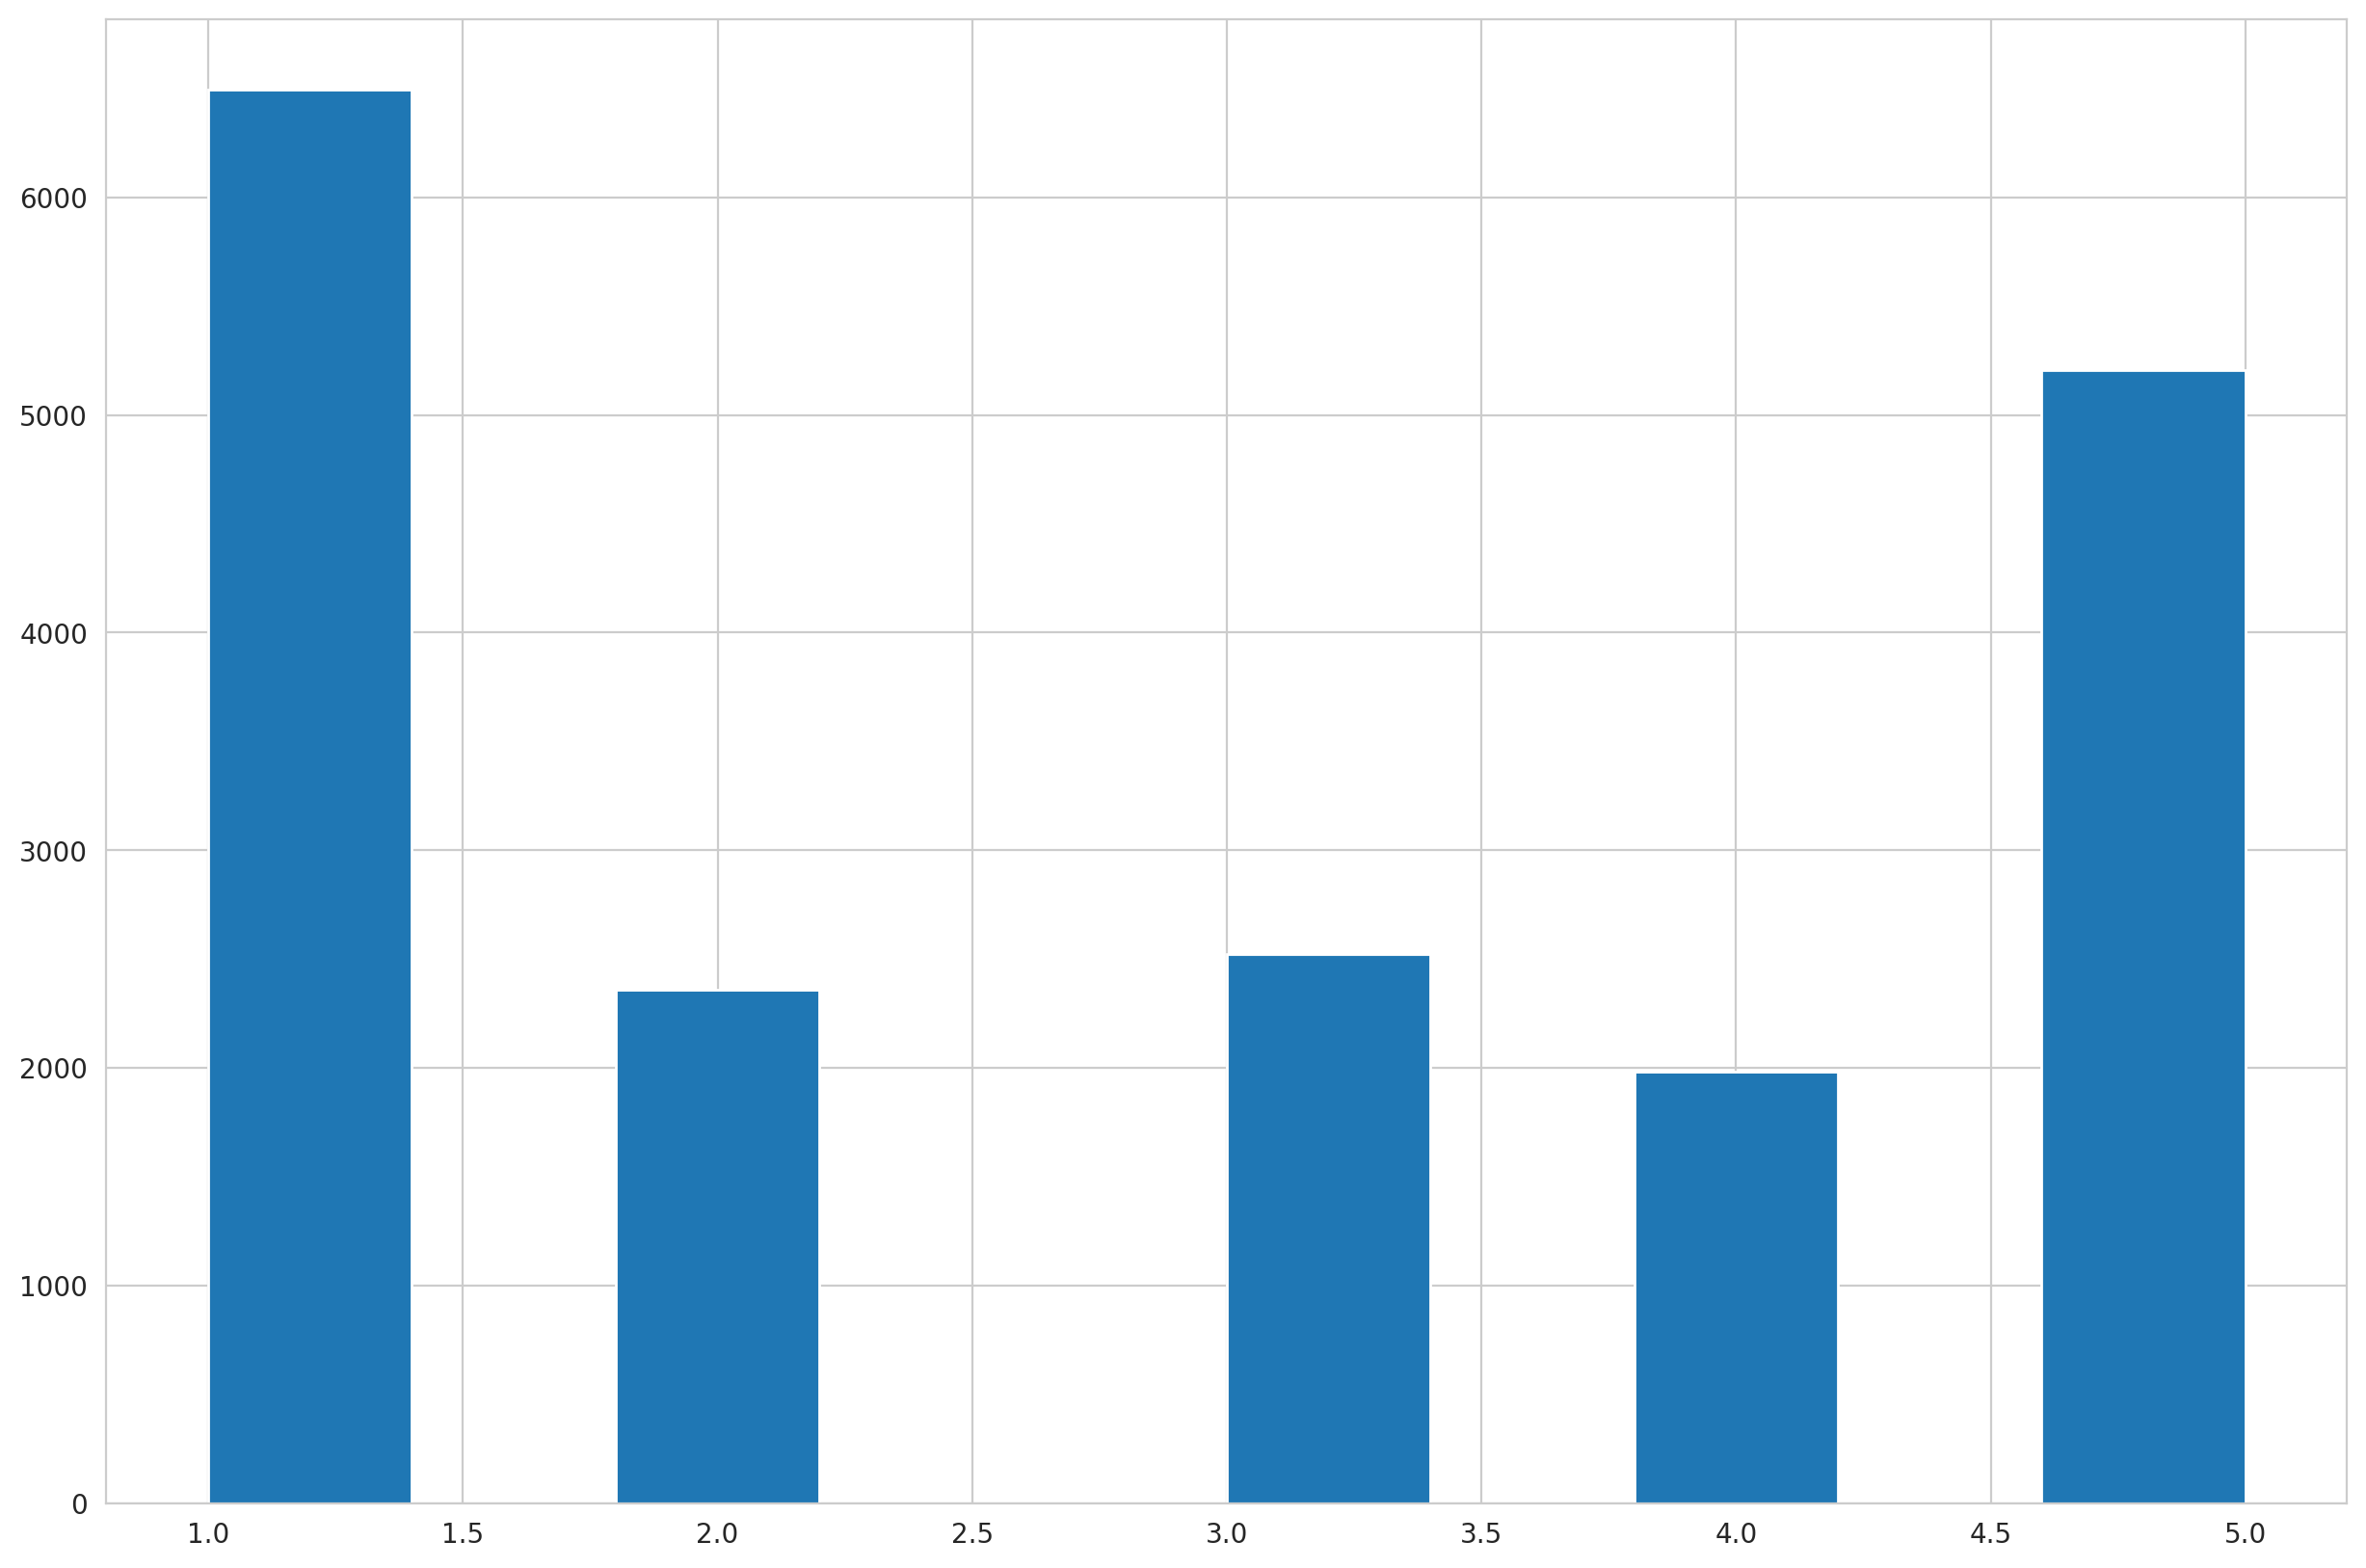

In [ ]:
plt.hist(df_gfrev['score'])
plt.show()

## Remove non en reviews

In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect, LangDetectException # Import LangDetectException

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'  # Or any other value to indicate an error

df_gfrev = df_gfrev[df_gfrev['content'].apply(detect_language) == 'en']

In [ ]:
# tampilkan jumlah bahasa yang terdetect dan berapa row yang termasuk bahasa tersebut

from collections import Counter

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Assuming df_gfrev is already defined as in your provided code
# If not, load your dataframe here:
# df_gfrev = pd.read_csv('/content/drive/My Drive/PBA/Review App Glory Fit.csv')

# Detect languages for each review
df_gfrev['language'] = df_gfrev['content'].apply(detect_language)

# Count language occurrences and create a new dataframe
language_counts = Counter(df_gfrev['language'])
language_df = pd.DataFrame.from_dict(language_counts, orient='index', columns=['count'])
language_df.index.name = 'language'
language_df = language_df.sort_values(by=['count'], ascending=False).reset_index()

language_df


language  count
0        en  14660
1        af     23
2        sl     12
3        nl     10
4        fr      9
5        cy      8
6        so      8
7        tl      5
8        es      5
9        ro      5
10       it      5
11       da      3
12       de      3
13       pl      3
14       id      2
15       et      2
16       ca      2
17       fi      2
18       sw      1
19       cs      1
20       sv      1
21       no      1
22       pt      1

In [ ]:
df_gfrev = df_gfrev[df_gfrev['language'] == 'en']


In [ ]:
df_gfrev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14660 entries, 0 to 18559
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   content               14660 non-null  object        
 1   score                 14660 non-null  int64         
 2   thumbsUpCount         14660 non-null  int64         
 3   reviewCreatedVersion  13281 non-null  object        
 4   at                    14660 non-null  datetime64[ns]
 5   appVersion            13281 non-null  object        
 6   id                    14660 non-null  int64         
 7   language              14660 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.0+ MB


In [ ]:
df_gfrev = df_gfrev.drop(columns =["language"])

# Text Pre-Processing

In [ ]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

### Step 1 Polaritas Sentimen sebelum Text Preprocessing

In [ ]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
df_gfrev['sentiment_polarity'] = df_gfrev['content'].apply(lambda x: TextBlob(x).polarity)
df_gfrev['sentiment_subjective'] = df_gfrev['content'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
df_gfrev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14660 entries, 0 to 18559
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   content               14660 non-null  object        
 1   score                 14660 non-null  int64         
 2   thumbsUpCount         14660 non-null  int64         
 3   reviewCreatedVersion  13281 non-null  object        
 4   at                    14660 non-null  datetime64[ns]
 5   appVersion            13281 non-null  object        
 6   id                    14660 non-null  int64         
 7   sentiment_polarity    14660 non-null  float64       
 8   sentiment_subjective  14660 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_gfrev['sentiment_rating'] = df_gfrev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

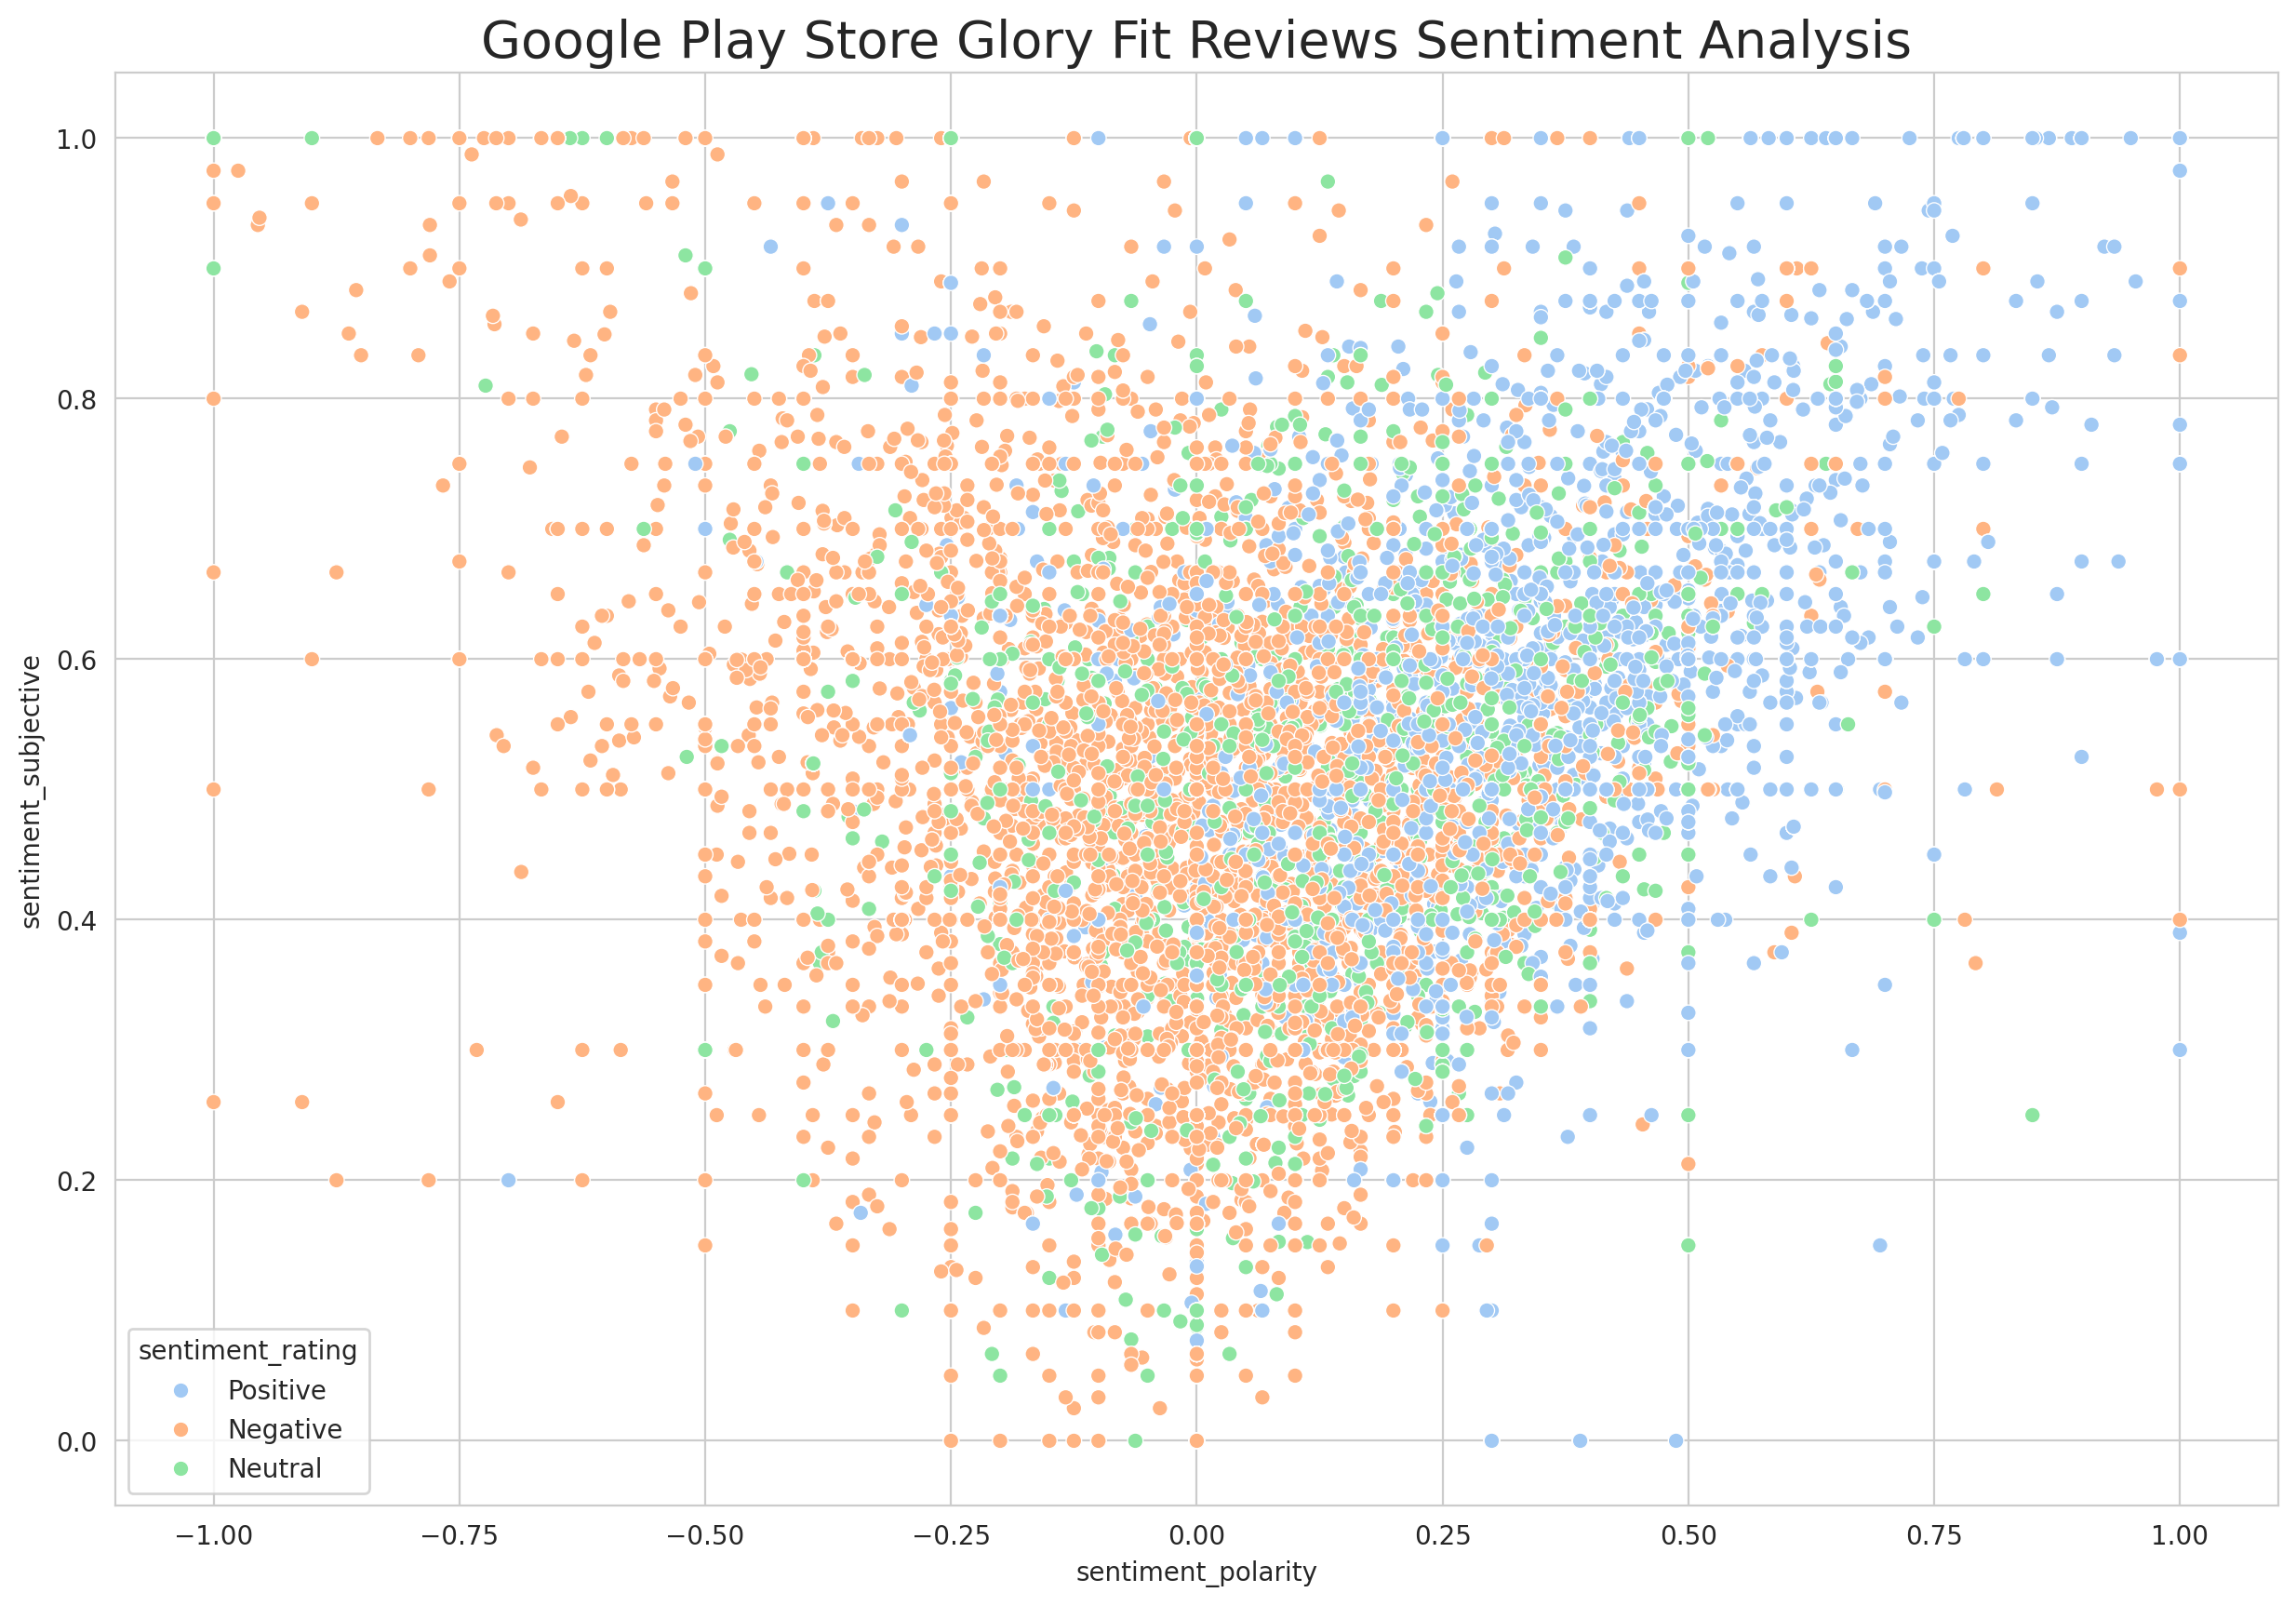

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_gfrev['sentiment_polarity'], y=df_gfrev['sentiment_subjective'],
                hue=df_gfrev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Glory Fit Reviews Sentiment Analysis", fontsize=20)
plt.show()

## Lowercasing

In [ ]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_gfrev['content'] = df_gfrev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_gfrev['content'][188])
print(df_gfrev['content'][10])
print(df_gfrev['content'][1934])

bought a brand new phone and my other 2 phones downloaded this with the smart watch I bought don't it's B's and a scam wreks your phone my brand new phone now I have to fix don't waste your your on the watch and your time or effort on the app don't destroy your phone please listen to me don't regret like the rest of us do
Has a lot of features but one, pretty big thing, that is bugging me. This app does not show all my contacts to allow me to import. I can get some contacts, but within the A section, it is not showing my wife. Thinking about returning it unless they can fix it to let me select up to 100 from ALL my contacts.
Can't set the time


In [ ]:
#Lowercase all reviews to see the difference
df_gfrev['content']= df_gfrev['content'].apply(lambda x: x.lower())
print(df_gfrev['content'][188])
print(df_gfrev['content'][10])
print(df_gfrev['content'][1934])

bought a brand new phone and my other 2 phones downloaded this with the smart watch i bought don't it's b's and a scam wreks your phone my brand new phone now i have to fix don't waste your your on the watch and your time or effort on the app don't destroy your phone please listen to me don't regret like the rest of us do
has a lot of features but one, pretty big thing, that is bugging me. this app does not show all my contacts to allow me to import. i can get some contacts, but within the a section, it is not showing my wife. thinking about returning it unless they can fix it to let me select up to 100 from all my contacts.
can't set the time


## Removing Emoji and Special Character

In [ ]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(df_gfrev.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
    expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return expe.findall(s)
    return expe.sub(r'',s)

for y in df_gfrev['content']:
    #print(str(extract_emojis(y)))
    extracted_emojis.append(str(extract_emojis(y)))

print(extracted_emojis)

True
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😃']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🤬', '🤬', '🤬']", '[]', '[]', '[]', "['👍', '🏻']", '[]', '[]', "['📱']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🤔']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😔']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😡']", "['🙏']", '[]', '[]', '[]', '[]', '[]', '[]', "['😕']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😍']", '[]', '[]', '[]', '

In [ ]:
import re
import string

def cleaning_text(text):
  # Menambah spasi setelah koma pada koma yang tidak diberi spasi
  text = re.sub(r",(?!\s)", ", ", text)
  # Menghapus tab, new line, back slice, dll
  text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
  # Menghapus karakter non ASCII (emoticon, chinese word, dll),
  text = text.encode('ascii', 'replace').decode('ascii')
  # Menghapus URL
  text = re.sub(r"(?i)(?:https?:\/\/)?(?:www\.)?(?:[a-zA-Z0-9-.]+)(?:\.[a-zA-Z]{2,6})(?:\/[^\s\r\n]*)?", "", text)
  # Menghapus whitespace di depan/belakang teks dan double++ spasi
  text = text.strip()
  text = re.sub('\s+', ' ', text)
  # Menghapus tanda baca
  text = text.translate(str.maketrans("", "", string.punctuation))

  return text

In [ ]:
df_gfrev['content'] = df_gfrev['content'].apply(cleaning_text)

In [ ]:
df_gfrev.head()

content  \
0  glory fit has been wonderful to use but lately been having an issue with the watch faces not showing up in my dial center i have a smartwatch and now purchased a ruimen watch both watches work wit...   
2                                                                                                                                                                         more than likely chinese spyware   
3                                                                                                                                                                                  cant get new free faces   
4                                                                                                                                                              i wish i could reply to messages but i cant   
6                                                                                  sweet little watch can you add some sort of privacy so notifications from spontaneous texts arent readable in meetings    

   score  thumbsUpCount reviewCreatedVersion                  at appVersion  \
0      4              0                3.6.9 2025-03-16 14:20:42      3.6.9   
2      1              0                 None 2025-03-16 13:22:38       None   
3      4              0                3.6.9 2025-03-16 11:34:51      3.6.9   
4      3              0                3.6.9 2025-03-16 03:57:33      3.6.9   
6      4              0                3.6.9 2025-03-16 01:51:06      3.6.9   

   id  sentiment_polarity  sentiment_subjective sentiment_rating  
0   1            0.206250              0.443750         Positive  
2   3            0.166667              0.500000         Negative  
3   4            0.268182              0.627273         Positive  
4   5            0.000000              0.000000          Neutral  
6   7            0.254167              0.683333         Positive

## Before stopwords removal

In [ ]:
from collections import Counter

def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    # Count word frequency using Counter (faster than FreqDist)
    word_counts = Counter(all_words)
    words_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

    # Select top 'terms' most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")
    ax.set(ylabel='Count')
    plt.show()


<ipython-input-30-b9ff2e5d559c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")


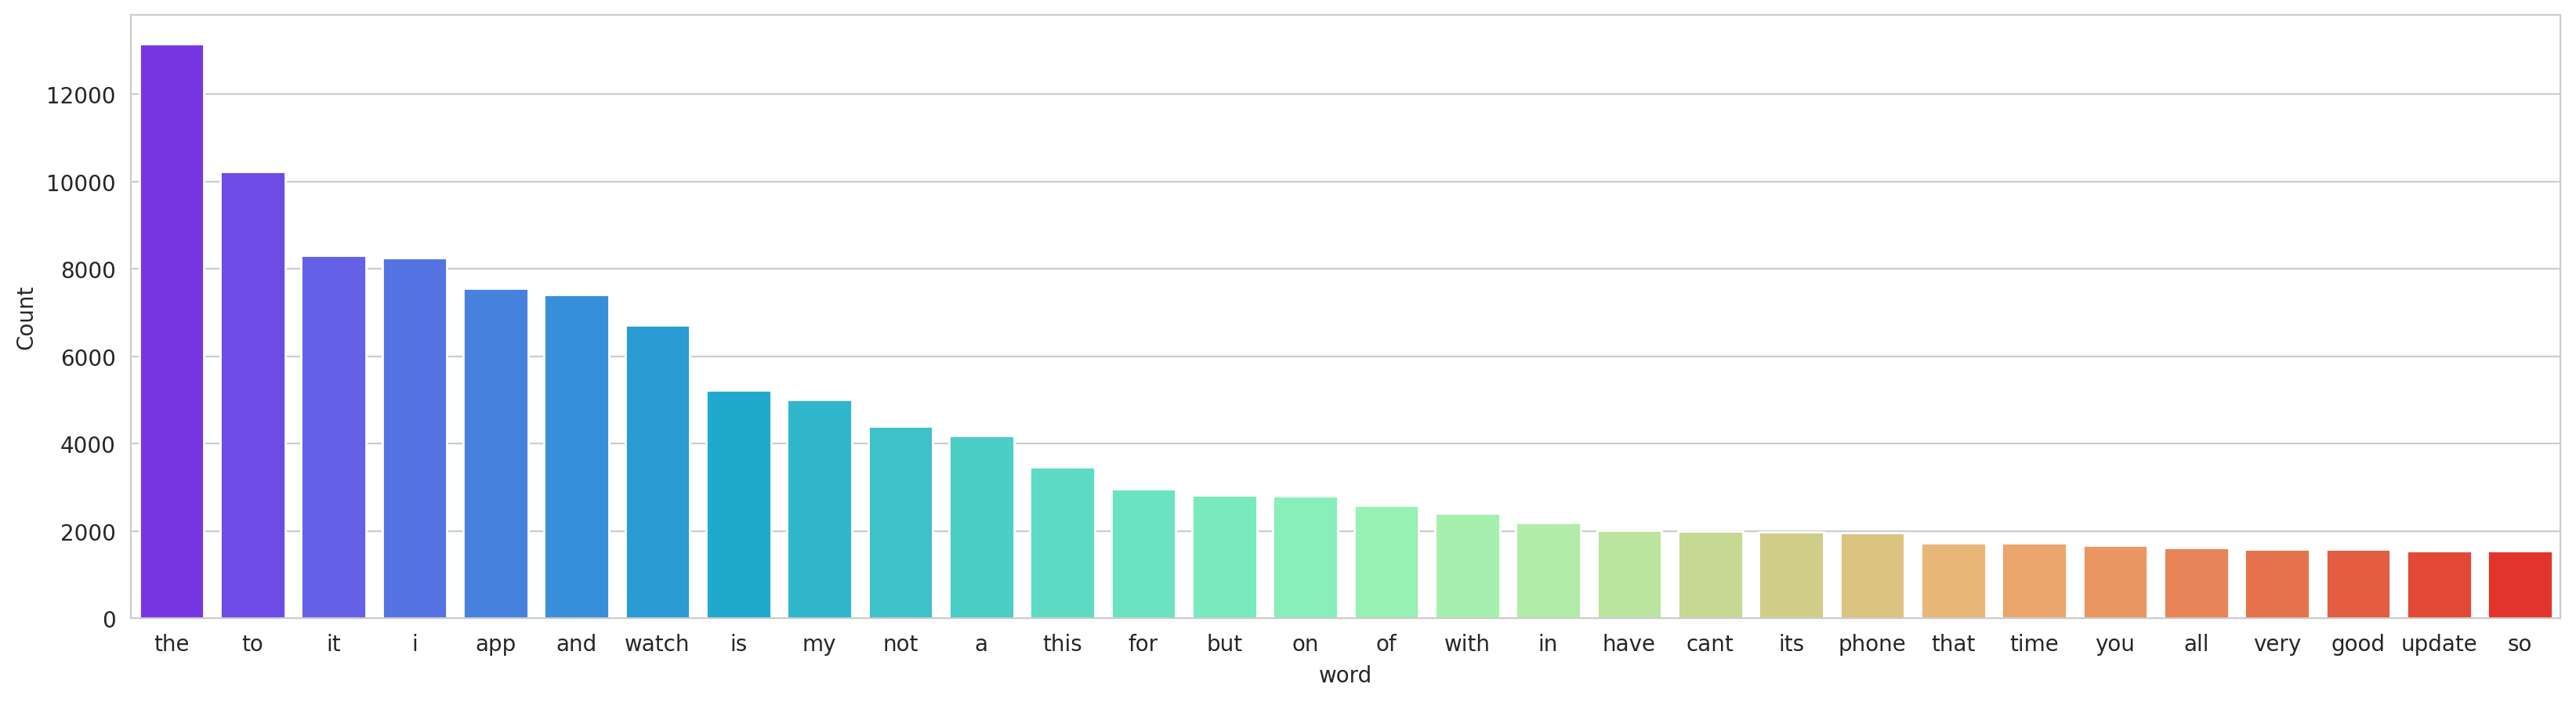

In [ ]:
freq_words(df_gfrev['content'])

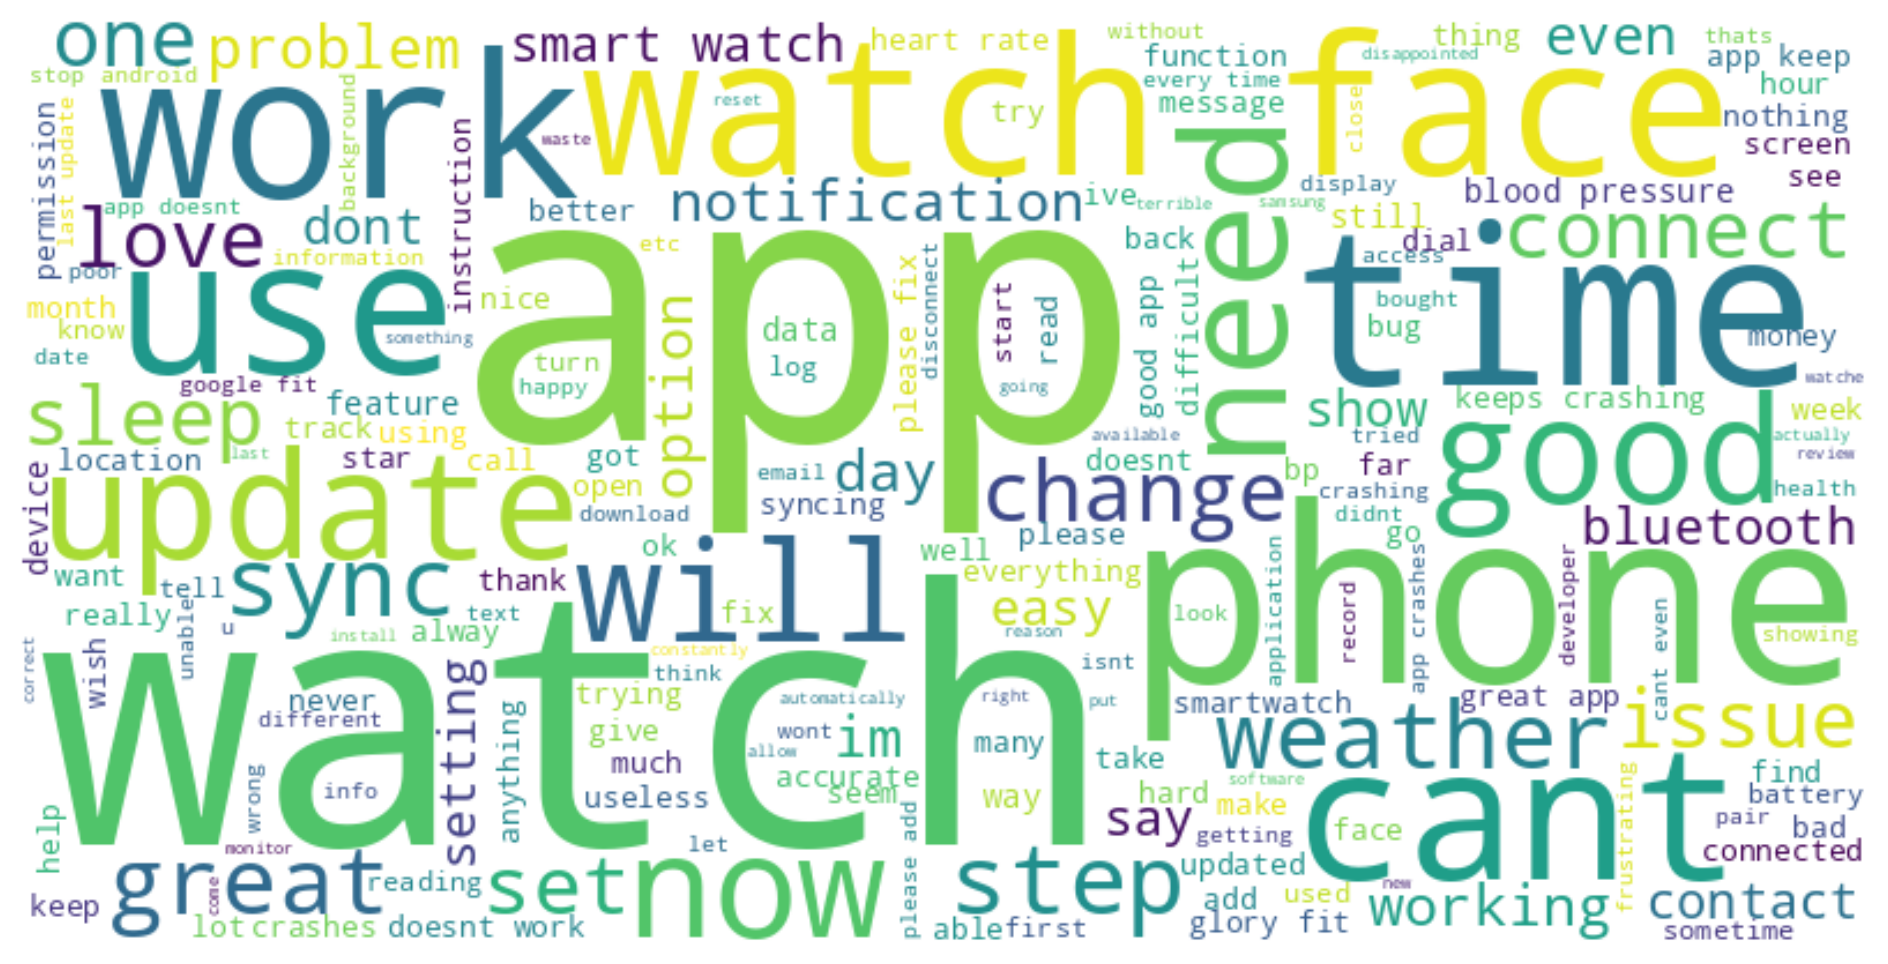

In [ ]:
# Join all of the words in the 'content' in one string
all_words_before = ' '.join(df_gfrev['content'])

# WordCloud before removing stopwords
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(all_words_before)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.show()

## Expand Contractions



In [ ]:
!pip install spacy
!pip install contractions
import spacy
import contractions

In [ ]:
def expand_contractions(text):
    return contractions.fix(text)  # "can't" → "cannot"

In [ ]:
df_gfrev['content'] = df_gfrev['content'].apply(expand_contractions)

In [ ]:
df_gfrev['content'].head()

0    glory fit has been wonderful to use but lately been having an issue with the watch faces not showing up in my dial center i have a smartwatch and now purchased a ruimen watch both watches work wit...
2                                                                                                                                                                           more than likely chinese spyware
3                                                                                                                                                                                  cannot get new free faces
4                                                                                                                                                              i wish i could reply to messages but i cannot
6                                                                                  sweet little watch can you add some sort of privacy so notifications from spontaneous texts are not readable in meetings 
Name: content, dtype: object

## Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt_tab' resource if it's not already downloaded
nltk.download('punkt_tab')

# Tokenize the 'cleaned_text' column
df_gfrev['token'] = df_gfrev['content'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Display results
print(df_gfrev[['content', 'token']])

                                                                                                                                                                                                       content  \
0      glory fit has been wonderful to use but lately been having an issue with the watch faces not showing up in my dial center i have a smartwatch and now purchased a ruimen watch both watches work wit...   
2                                                                                                                                                                             more than likely chinese spyware   
3                                                                                                                                                                                    cannot get new free faces   
4                                                                                                                                                               

In [ ]:
df_gfrev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14660 entries, 0 to 18559
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   content               14660 non-null  object        
 1   score                 14660 non-null  int64         
 2   thumbsUpCount         14660 non-null  int64         
 3   reviewCreatedVersion  13281 non-null  object        
 4   at                    14660 non-null  datetime64[ns]
 5   appVersion            13281 non-null  object        
 6   id                    14660 non-null  int64         
 7   sentiment_polarity    14660 non-null  float64       
 8   sentiment_subjective  14660 non-null  float64       
 9   sentiment_rating      14660 non-null  object        
 10  token                 14660 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.8+ MB


## Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Add 'app' to the stopwords list
english_stopwords.extend(['app'])

# Apply the extended stopwords to your DataFrame
df_gfrev["token_after_sr"] = df_gfrev["token"].apply(lambda tokens: [word for word in tokens if word not in english_stopwords and word.isalpha()])
# Gabungkan token menjadi teks yang bersih dalam kolom cleaned_content
df_gfrev["cleaned_content"] = df_gfrev["token_after_sr"].apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_gfrev.head()

content  \
0  glory fit has been wonderful to use but lately been having an issue with the watch faces not showing up in my dial center i have a smartwatch and now purchased a ruimen watch both watches work wit...   
2                                                                                                                                                                         more than likely chinese spyware   
3                                                                                                                                                                                cannot get new free faces   
4                                                                                                                                                            i wish i could reply to messages but i cannot   
6                                                                                sweet little watch can you add some sort of privacy so notifications from spontaneous texts are not readable in meetings    

   score  thumbsUpCount reviewCreatedVersion                  at appVersion  \
0      4              0                3.6.9 2025-03-16 14:20:42      3.6.9   
2      1              0                 None 2025-03-16 13:22:38       None   
3      4              0                3.6.9 2025-03-16 11:34:51      3.6.9   
4      3              0                3.6.9 2025-03-16 03:57:33      3.6.9   
6      4              0                3.6.9 2025-03-16 01:51:06      3.6.9   

   id  sentiment_polarity  sentiment_subjective sentiment_rating  \
0   1            0.206250              0.443750         Positive   
2   3            0.166667              0.500000         Negative   
3   4            0.268182              0.627273         Positive   
4   5            0.000000              0.000000          Neutral   
6   7            0.254167              0.683333         Positive   

                                                                                                                                                                                                     token  \
0  [glory, fit, has, been, wonderful, to, use, but, lately, been, having, an, issue, with, the, watch, faces, not, showing, up, in, my, dial, center, i, have, a, smartwatch, and, now, purchased, a, r...   
2                                                                                                                                                                   [more, than, likely, chinese, spyware]   
3                                                                                                                                                                        [can, not, get, new, free, faces]   
4                                                                                                                                               [i, wish, i, could, reply, to, messages, but, i, can, not]   
6                                                            [sweet, little, watch, can, you, add, some, sort, of, privacy, so, notifications, from, spontaneous, texts, are, not, readable, in, meetings]   

                                                                                                                                                                                            token_after_sr  \
0  [glory, fit, wonderful, use, lately, issue, watch, faces, showing, dial, center, smartwatch, purchased, ruimen, watch, watches, work, done, update, days, back, dail, center, empty, uninstalled, in...   
2                                                                                                                                                                               [likely, chinese, spyware]   
3                                                                                                                                                                                  [get, new, free, faces]   
4            

<ipython-input-30-b9ff2e5d559c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")


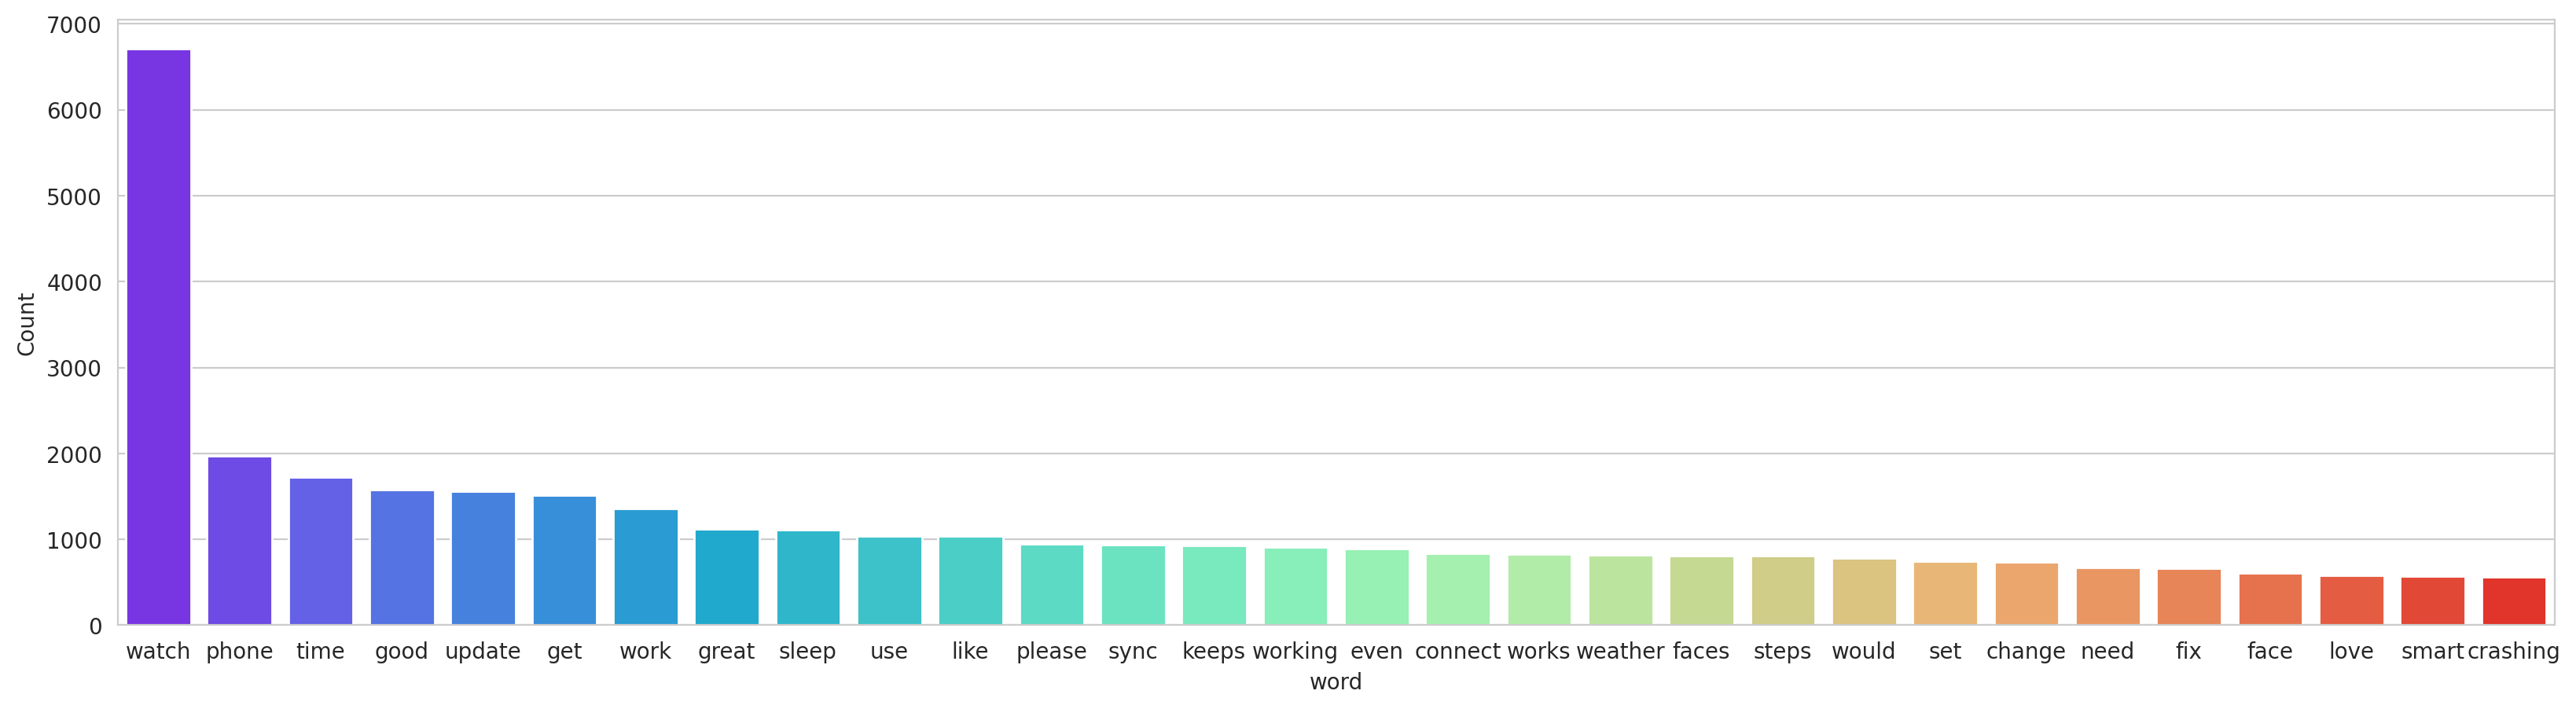

In [ ]:
# Frekuensi kata setelah pembersihan stopwords
freq_words(df_gfrev['cleaned_content'])

## Stemming & emmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

# Inisialisasi lemmatizer dan stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Fungsi untuk lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Fungsi untuk stemming
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Terapkan lemmatization ke kolom token_after_sr
df_gfrev["token_after_lemma"] = df_gfrev["token_after_sr"].apply(lemmatize_tokens)

# Terapkan stemming ke kolom token_after_sr
df_gfrev["token_after_stem"] = df_gfrev["token_after_sr"].apply(stem_tokens)

# Gabungkan kembali token setelah lemmatization menjadi satu string
df_gfrev["cleaned_content"] = df_gfrev["token_after_lemma"].apply(lambda tokens: ' '.join(tokens))

# Tampilkan 5 baris pertama DataFrame untuk verifikasi
df_gfrev.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


content  \
0  glory fit has been wonderful to use but lately been having an issue with the watch faces not showing up in my dial center i have a smartwatch and now purchased a ruimen watch both watches work wit...   
2                                                                                                                                                                         more than likely chinese spyware   
3                                                                                                                                                                                cannot get new free faces   
4                                                                                                                                                            i wish i could reply to messages but i cannot   
6                                                                                sweet little watch can you add some sort of privacy so notifications from spontaneous texts are not readable in meetings    

   score  thumbsUpCount reviewCreatedVersion                  at appVersion  \
0      4              0                3.6.9 2025-03-16 14:20:42      3.6.9   
2      1              0                 None 2025-03-16 13:22:38       None   
3      4              0                3.6.9 2025-03-16 11:34:51      3.6.9   
4      3              0                3.6.9 2025-03-16 03:57:33      3.6.9   
6      4              0                3.6.9 2025-03-16 01:51:06      3.6.9   

   id  sentiment_polarity  sentiment_subjective sentiment_rating  \
0   1            0.206250              0.443750         Positive   
2   3            0.166667              0.500000         Negative   
3   4            0.268182              0.627273         Positive   
4   5            0.000000              0.000000          Neutral   
6   7            0.254167              0.683333         Positive   

                                                                                                                                                                                                     token  \
0  [glory, fit, has, been, wonderful, to, use, but, lately, been, having, an, issue, with, the, watch, faces, not, showing, up, in, my, dial, center, i, have, a, smartwatch, and, now, purchased, a, r...   
2                                                                                                                                                                   [more, than, likely, chinese, spyware]   
3                                                                                                                                                                        [can, not, get, new, free, faces]   
4                                                                                                                                               [i, wish, i, could, reply, to, messages, but, i, can, not]   
6                                                            [sweet, little, watch, can, you, add, some, sort, of, privacy, so, notifications, from, spontaneous, texts, are, not, readable, in, meetings]   

                                                                                                                                                                                            token_after_sr  \
0  [glory, fit, wonderful, use, lately, issue, watch, faces, showing, dial, center, smartwatch, purchased, ruimen, watch, watches, work, done, update, days, back, dail, center, empty, uninstalled, in...   
2                                                                                                                                                                               [likely, chinese, spyware]   
3                                                                                                                                                                                  [get, new, free, faces]   
4            

# Sentiment Analysis after Text Preprocessing

In [ ]:
df_gfrev2 = df_gfrev.copy()

In [ ]:
df_gfrev2.drop(columns = ['sentiment_polarity', 'sentiment_subjective'])

content  \
0      glory fit has been wonderful to use but lately been having an issue with the watch faces not showing up in my dial center i have a smartwatch and now purchased a ruimen watch both watches work wit...   
2                                                                                                                                                                             more than likely chinese spyware   
3                                                                                                                                                                                    cannot get new free faces   
4                                                                                                                                                                i wish i could reply to messages but i cannot   
6                                                                                    sweet little watch can you add some sort of privacy so notifications from spontaneous texts are not readable in meetings    
...                                                                                                                                                                                                        ...   
18555                                                         uses a lot of battery due to constantly searching for gps needs scheduled updates not sure where the weather is sourced from but is always wrong   
18556             very limited but what is worse the features it should have such as history consistently fail first it was failure to upload so i reinstalled now it says i am not logged in even though i am   
18557              how to set up the sleep monitoring i does not respond and i already have the latest software and it is properly bind to my phone all the other features are working good but the sleep time   
18558                                                                                                                                             not able to run at background so no receive of notifications   
18559  this app uses a lot of battery and a lot of data in 2 days it used 30mb of to doing what and the last night it used 20 of battery generally the night my phone consumes only 1 but this time only fr...   

       score  thumbsUpCount reviewCreatedVersion                  at  \
0          4              0                3.6.9 2025-03-16 14:20:42   
2          1              0                 None 2025-03-16 13:22:38   
3          4              0                3.6.9 2025-03-16 11:34:51   
4          3              0                3.6.9 2025-03-16 03:57:33   
6          4              0                3.6.9 2025-03-16 01:51:06   
...      ...            ...                  ...                 ...   
18555      3              4                1.4.5 2017-12-29 08:45:08   
18556      1              3                1.4.5 2017-12-27 08:56:31   
18557      1              1              1.3.9.1 2017-11-23 05:34:35   
18558      2              2              1.3.9.1 2017-11-15 03:36:07   
18559      1              3                1.3.5 2017-10-01 09:28:10   

      appVersion     id sentiment_rating  \
0          3.6.9      1         Positive   
2           None      3         Negative   
3          3.6.9      4         Positive   
4          3.6.9      5          Neutral   
6          3.6.9      7         Positive   
...          ...    ...              ...   
18555      1.4.5  18556          Neutral   
18556      1.4.5  18557         Negative   
18557    1.3.9.1  18558         Negative   
18558    1.3.9.1  18559         Negative   
18559      1.3.5  18560         Negative   

                                                                                                                                                                                                         token  \
0      [glory, fit, has, been, wonderful, to, use, but, lately, been, havi

In [ ]:
df_gfrev2['cleaned_content'] = df_gfrev2['cleaned_content'].fillna('')

df_gfrev2['sentiment_polarity'] = df_gfrev2['cleaned_content'].apply(lambda x: TextBlob(x).polarity)
df_gfrev2['sentiment_subjective'] = df_gfrev2['cleaned_content'].apply(lambda x: TextBlob(x).subjectivity)


# Display the results
df_gfrev2


content  \
0      glory fit has been wonderful to use but lately been having an issue with the watch faces not showing up in my dial center i have a smartwatch and now purchased a ruimen watch both watches work wit...   
2                                                                                                                                                                             more than likely chinese spyware   
3                                                                                                                                                                                    cannot get new free faces   
4                                                                                                                                                                i wish i could reply to messages but i cannot   
6                                                                                    sweet little watch can you add some sort of privacy so notifications from spontaneous texts are not readable in meetings    
...                                                                                                                                                                                                        ...   
18555                                                         uses a lot of battery due to constantly searching for gps needs scheduled updates not sure where the weather is sourced from but is always wrong   
18556             very limited but what is worse the features it should have such as history consistently fail first it was failure to upload so i reinstalled now it says i am not logged in even though i am   
18557              how to set up the sleep monitoring i does not respond and i already have the latest software and it is properly bind to my phone all the other features are working good but the sleep time   
18558                                                                                                                                             not able to run at background so no receive of notifications   
18559  this app uses a lot of battery and a lot of data in 2 days it used 30mb of to doing what and the last night it used 20 of battery generally the night my phone consumes only 1 but this time only fr...   

       score  thumbsUpCount reviewCreatedVersion                  at  \
0          4              0                3.6.9 2025-03-16 14:20:42   
2          1              0                 None 2025-03-16 13:22:38   
3          4              0                3.6.9 2025-03-16 11:34:51   
4          3              0                3.6.9 2025-03-16 03:57:33   
6          4              0                3.6.9 2025-03-16 01:51:06   
...      ...            ...                  ...                 ...   
18555      3              4                1.4.5 2017-12-29 08:45:08   
18556      1              3                1.4.5 2017-12-27 08:56:31   
18557      1              1              1.3.9.1 2017-11-23 05:34:35   
18558      2              2              1.3.9.1 2017-11-15 03:36:07   
18559      1              3                1.3.5 2017-10-01 09:28:10   

      appVersion     id  sentiment_polarity  sentiment_subjective  \
0          3.6.9      1            0.267500              0.510000   
2           None      3            0.000000              0.500000   
3          3.6.9      4            0.268182              0.627273   
4          3.6.9      5            0.000000              0.000000   
6          3.6.9      7            0.254167              0.683333   
...          ...    ...                 ...                   ...   
18555      1.4.5  18556           -0.031250              0.624306   
18556      1.4.5  18557           -0.207619              0.335238   
18557    1.3.9.1  18558            0.400000              0.533333   
18558    1.3.9.1  18559            0.500000              0.625000   
18559      1.3.5  18560            0.025000           

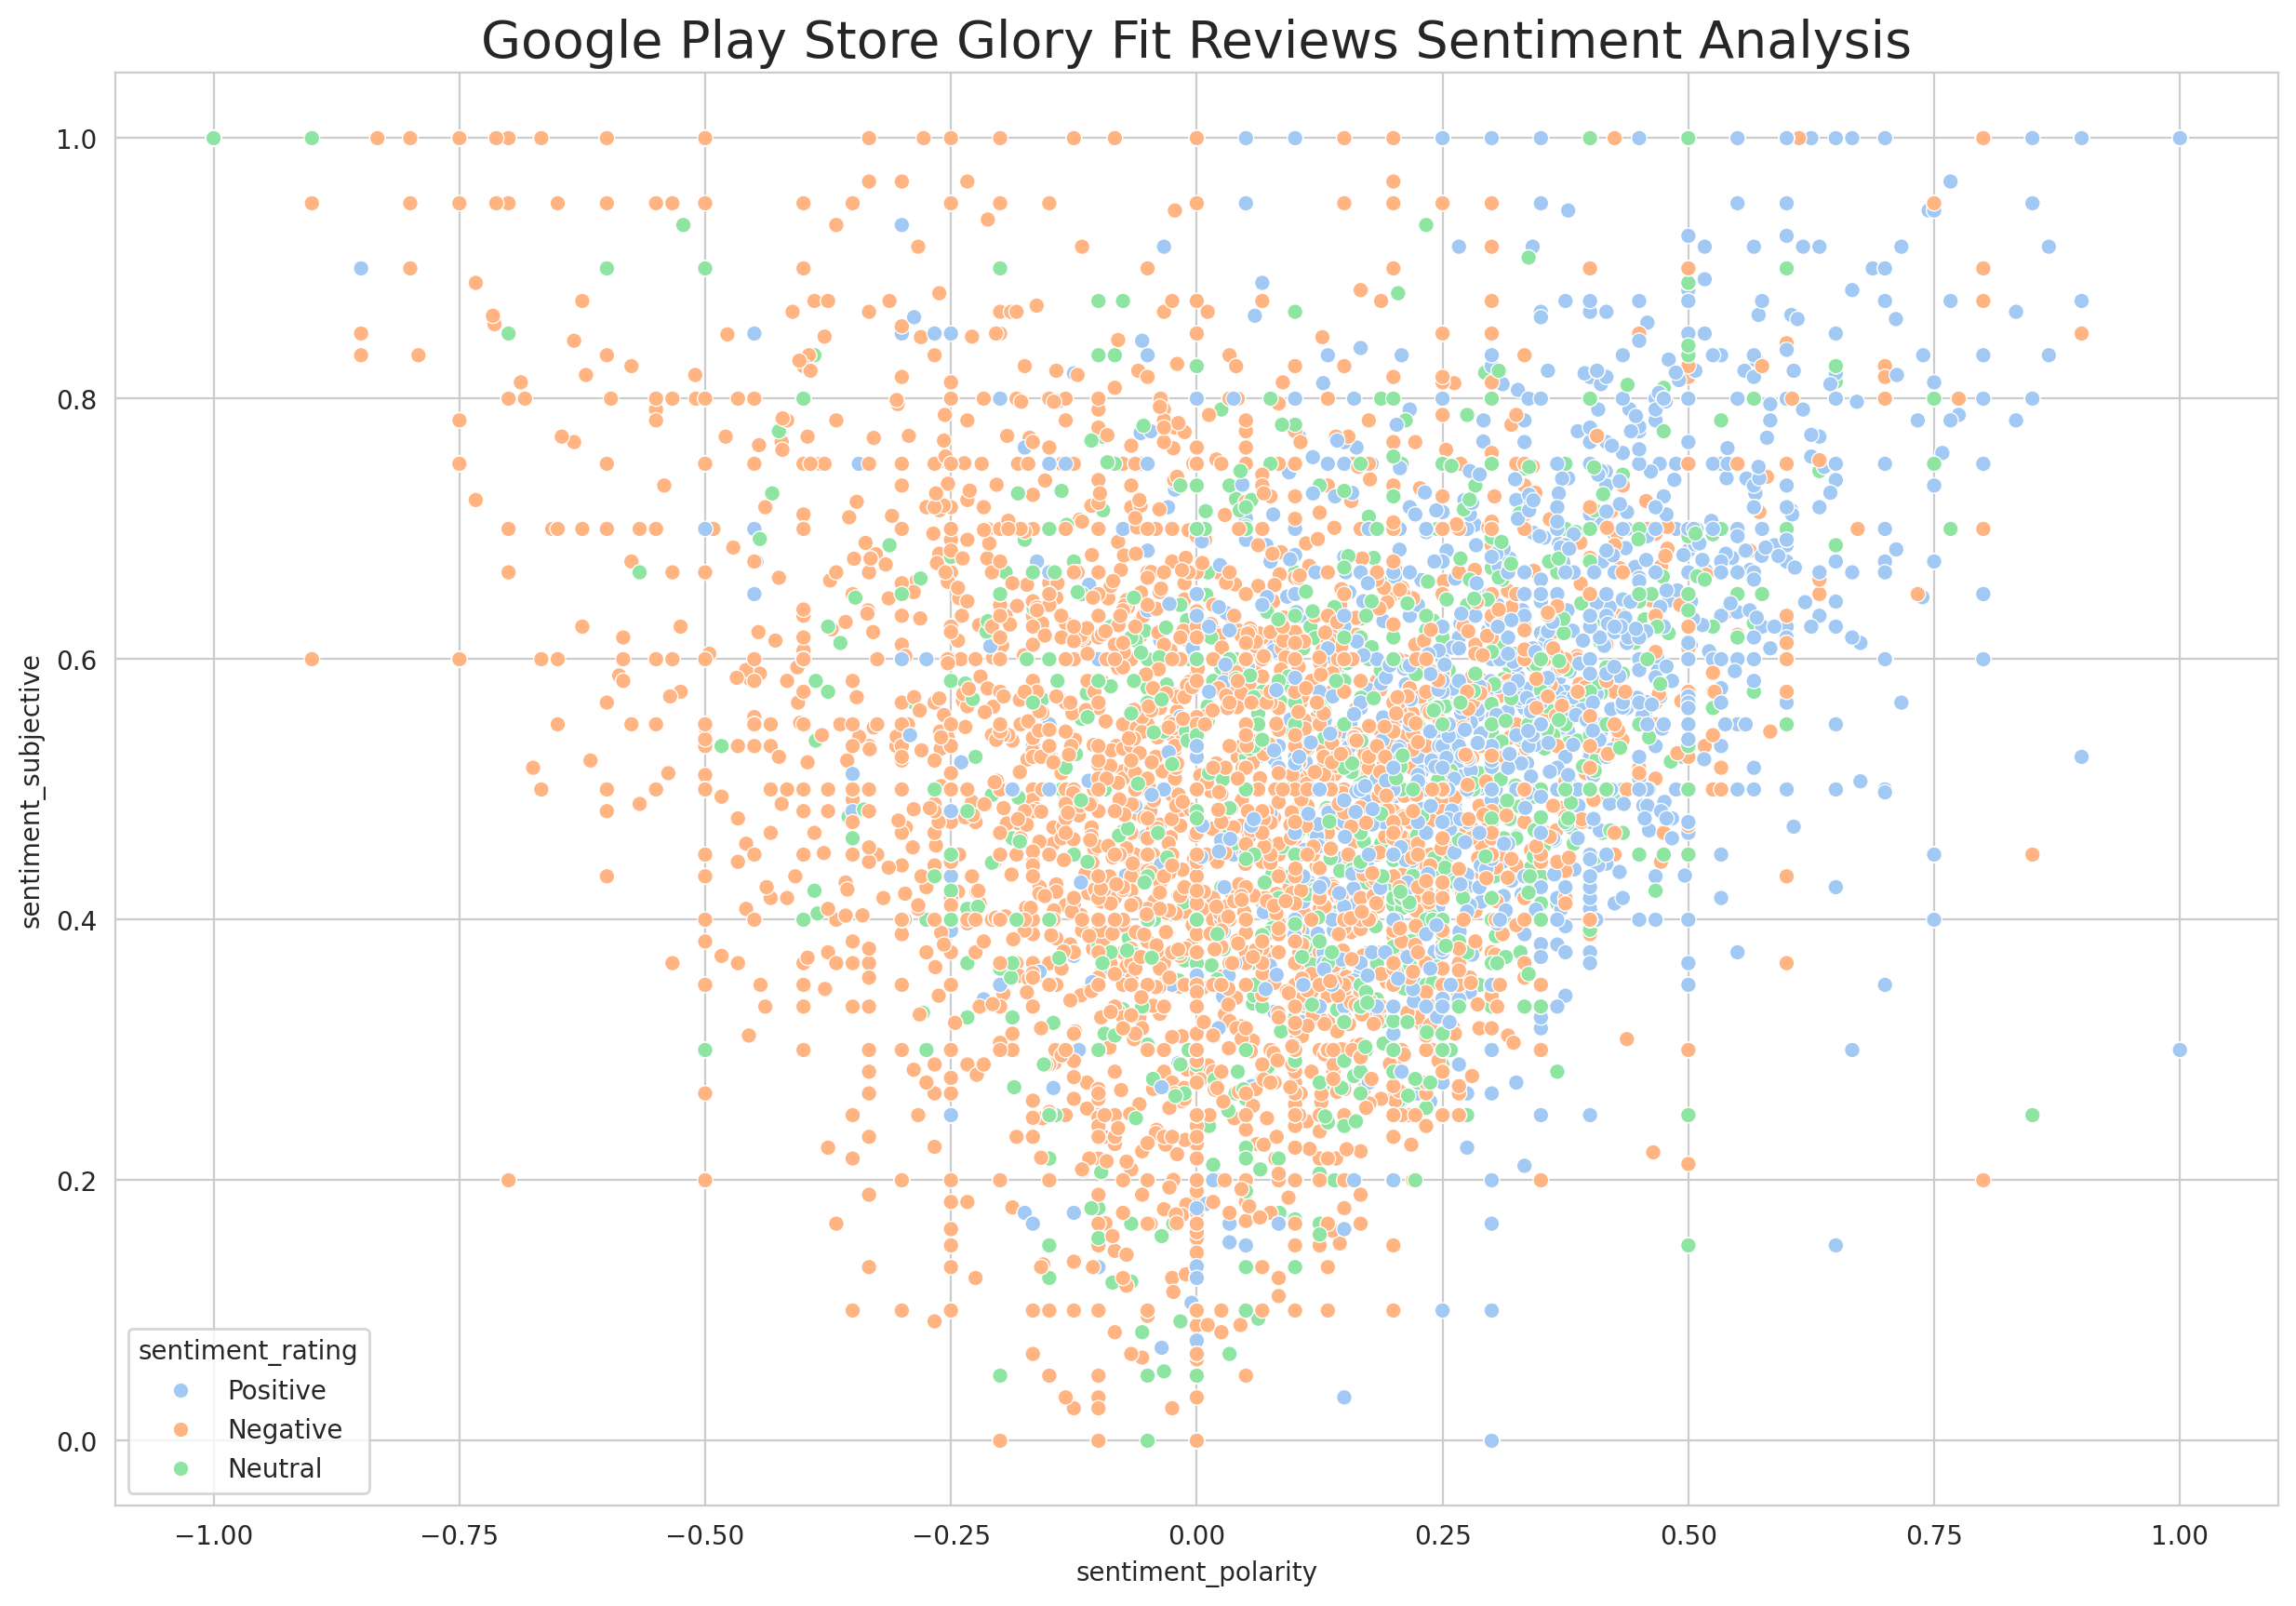

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_gfrev2['sentiment_polarity'], y=df_gfrev2['sentiment_subjective'],
                hue=df_gfrev2['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Glory Fit Reviews Sentiment Analysis", fontsize=20)
plt.show()

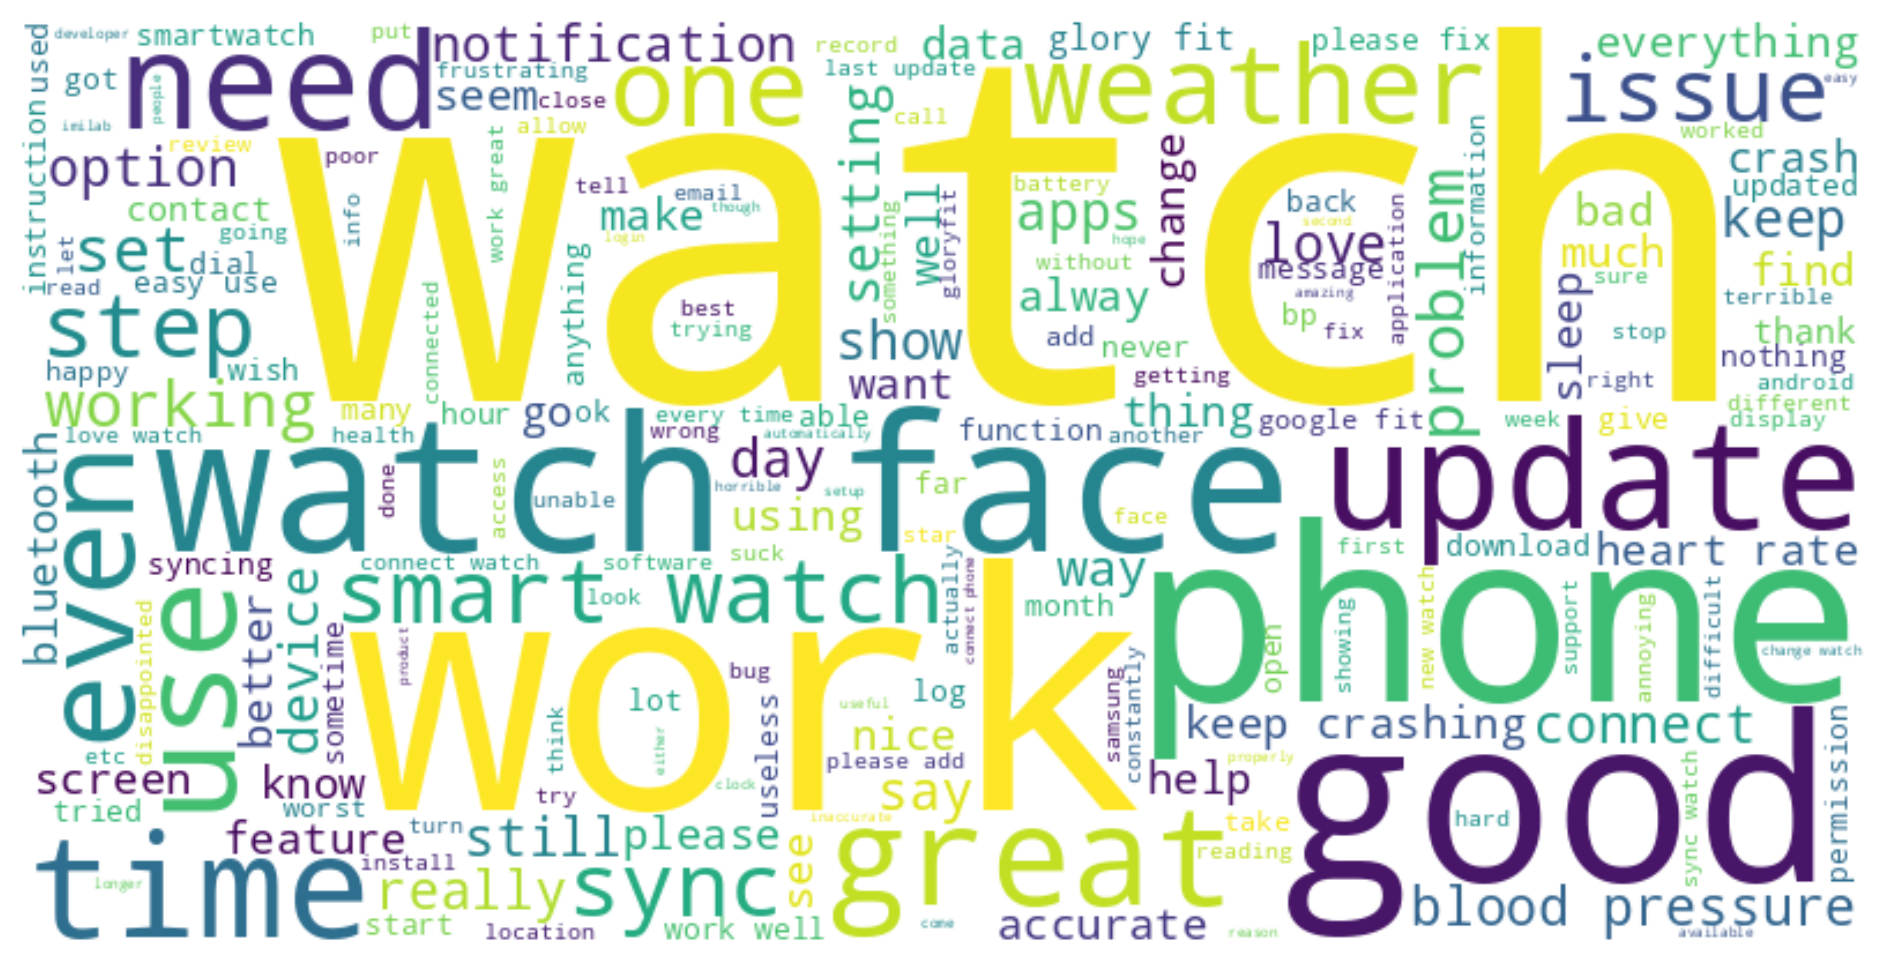

In [ ]:
# Join all of the words in the 'content' in one string
all_words_before = ' '.join(df_gfrev2['cleaned_content'])

# WordCloud before removing stopwords
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(all_words_before)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.show()

# EXTRACT TO NEW CSV

In [ ]:
df_gfrev2.to_csv('/content/drive/My Drive/PBA/Text_PreProcessed_Review_App_Glory_Fit.csv', index=False)

# Exploratory Data Analysis

## Distribusi Skor

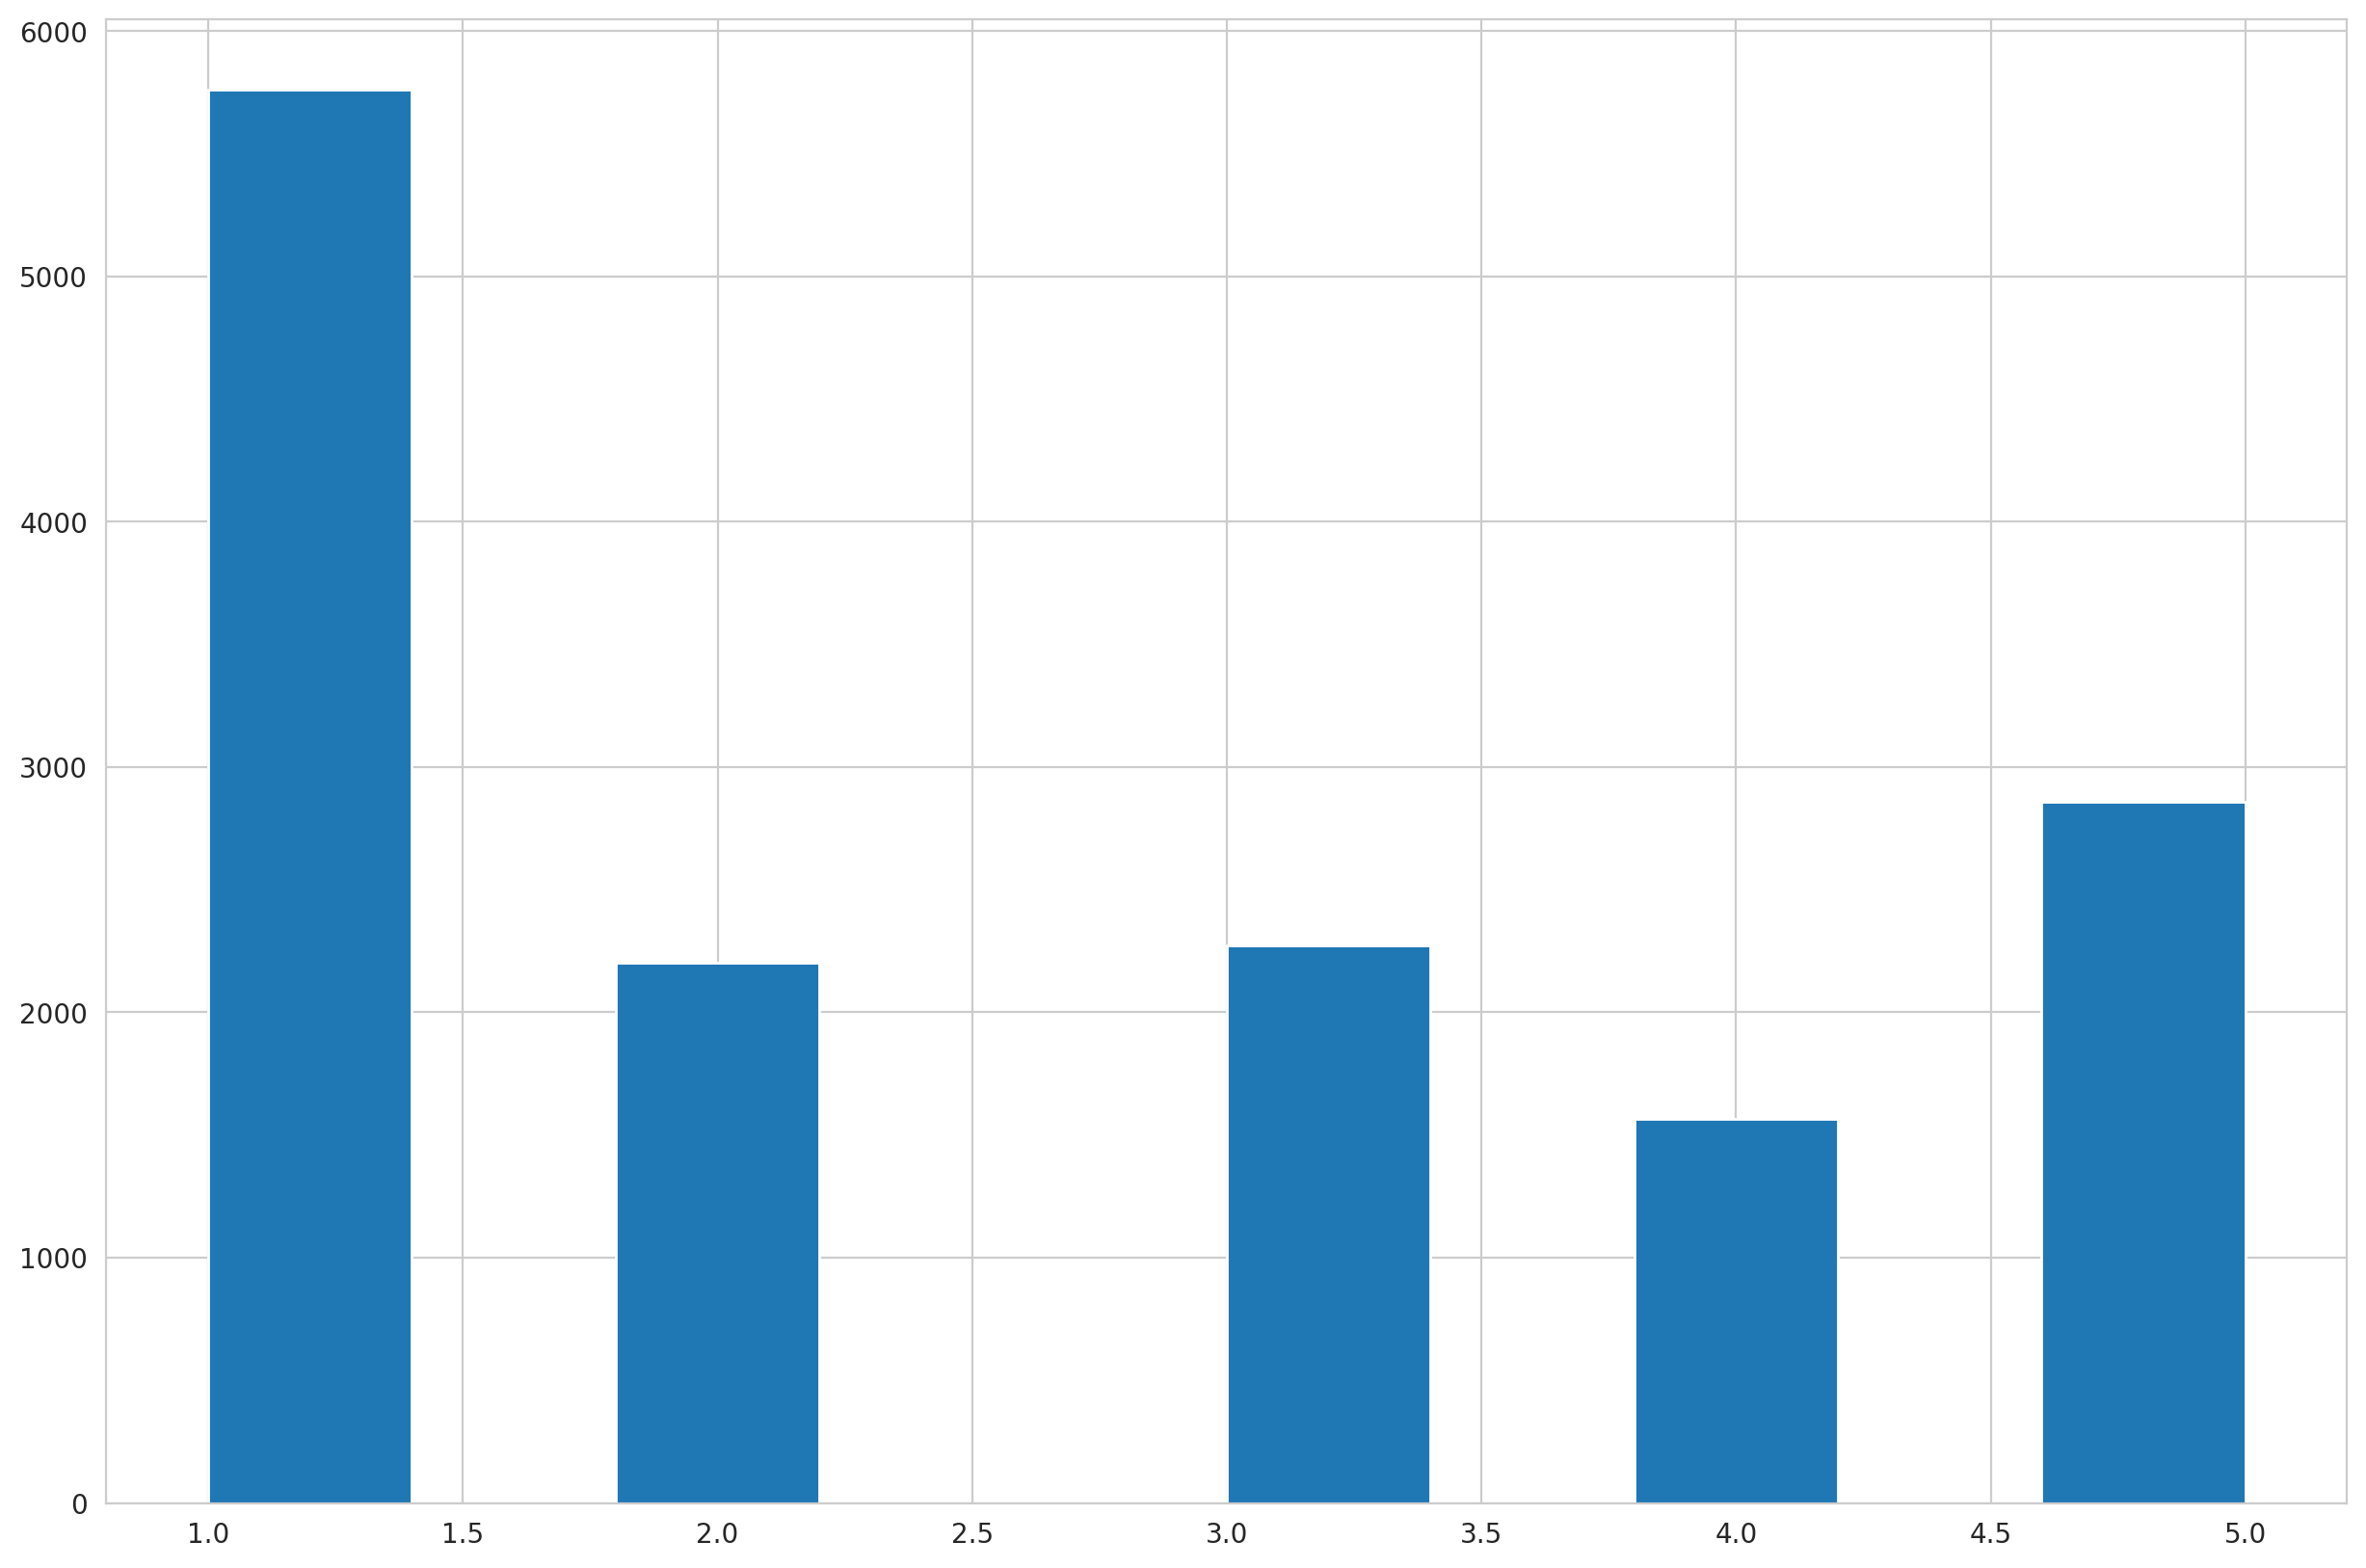

In [ ]:
plt.hist(df_gfrev2['score'])
plt.show()

## Jumlah review per tahun

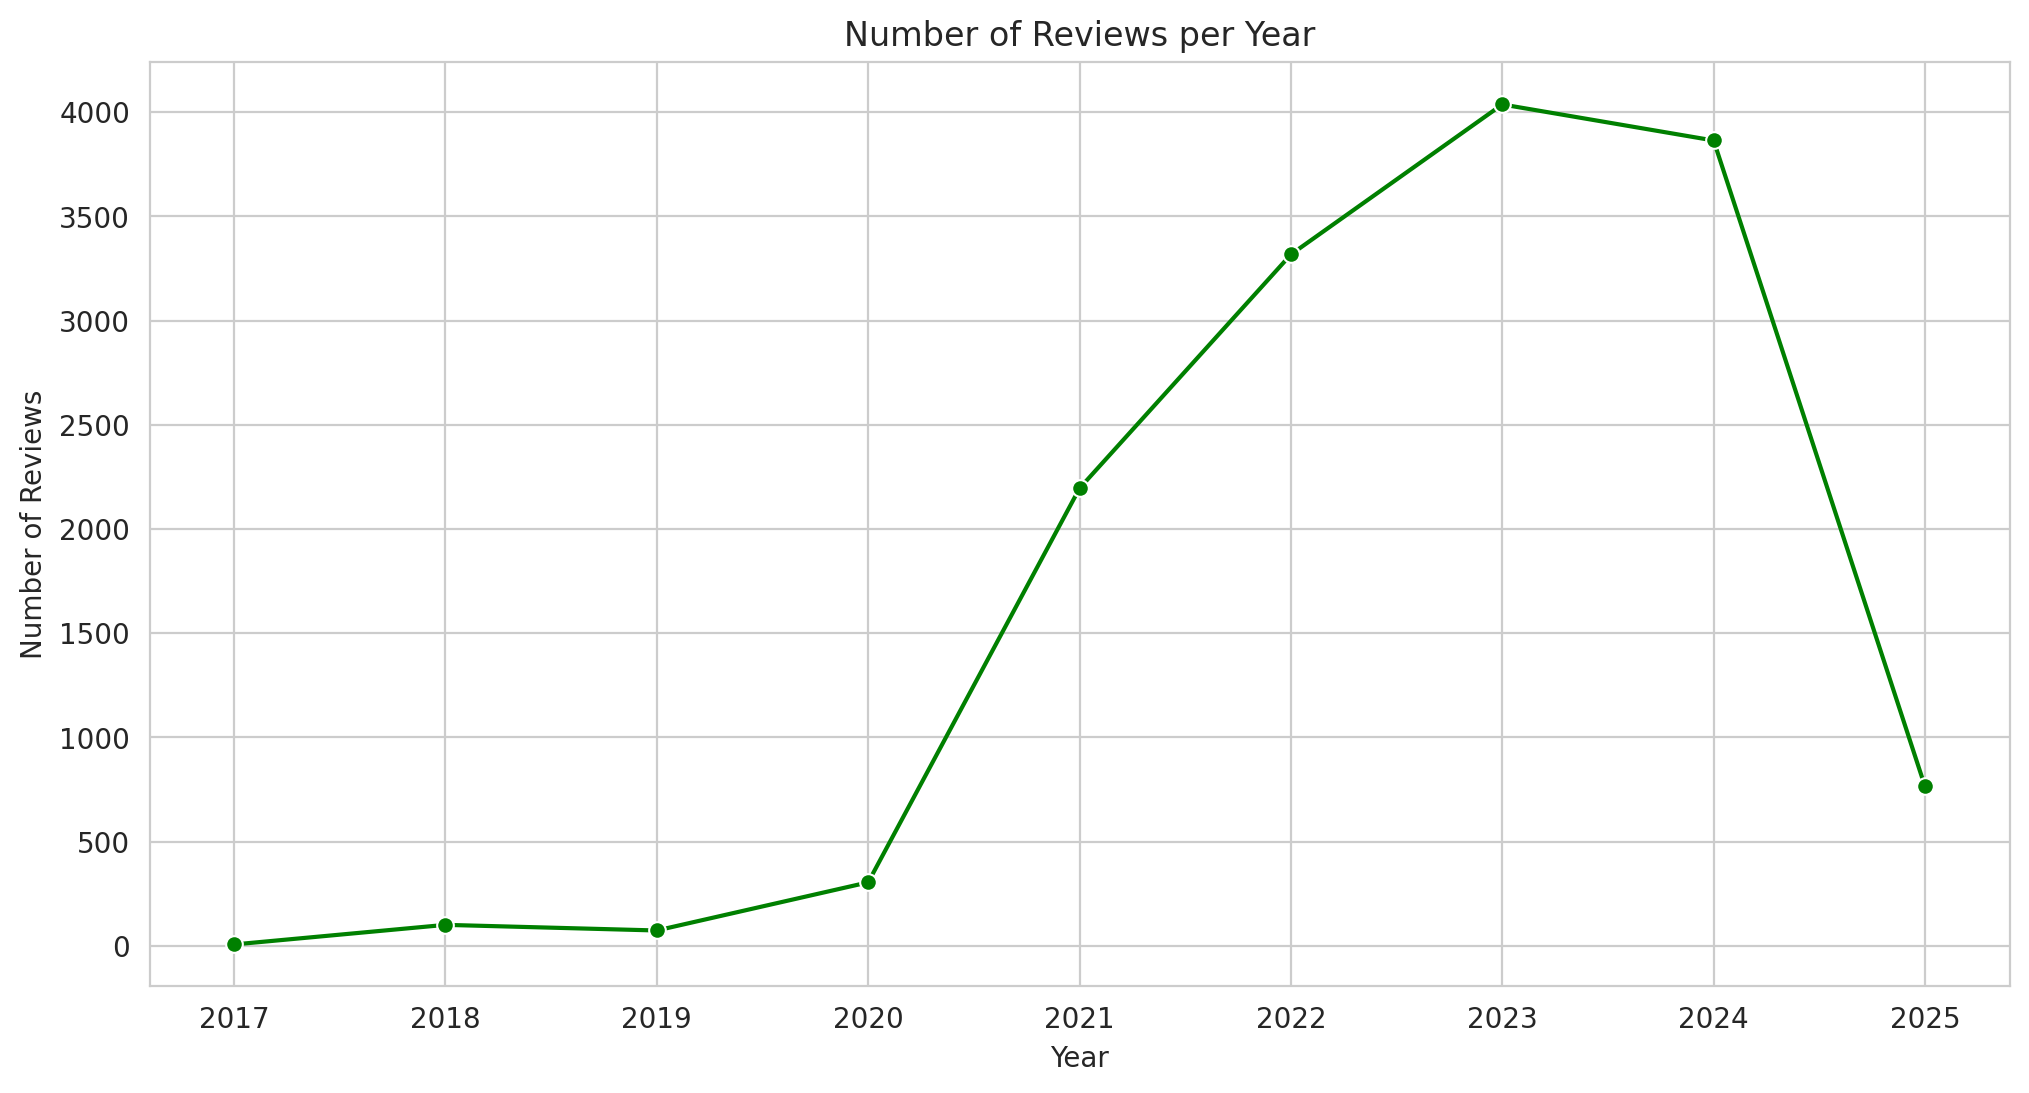

In [ ]:
df_gfrev2['at'] = pd.to_datetime(df_gfrev2['at'])
df_gfrev2['year'] = df_gfrev2['at'].dt.year
year_counts = df_gfrev2['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='green')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

## Jumlah review tiap bulan di setiap tahun

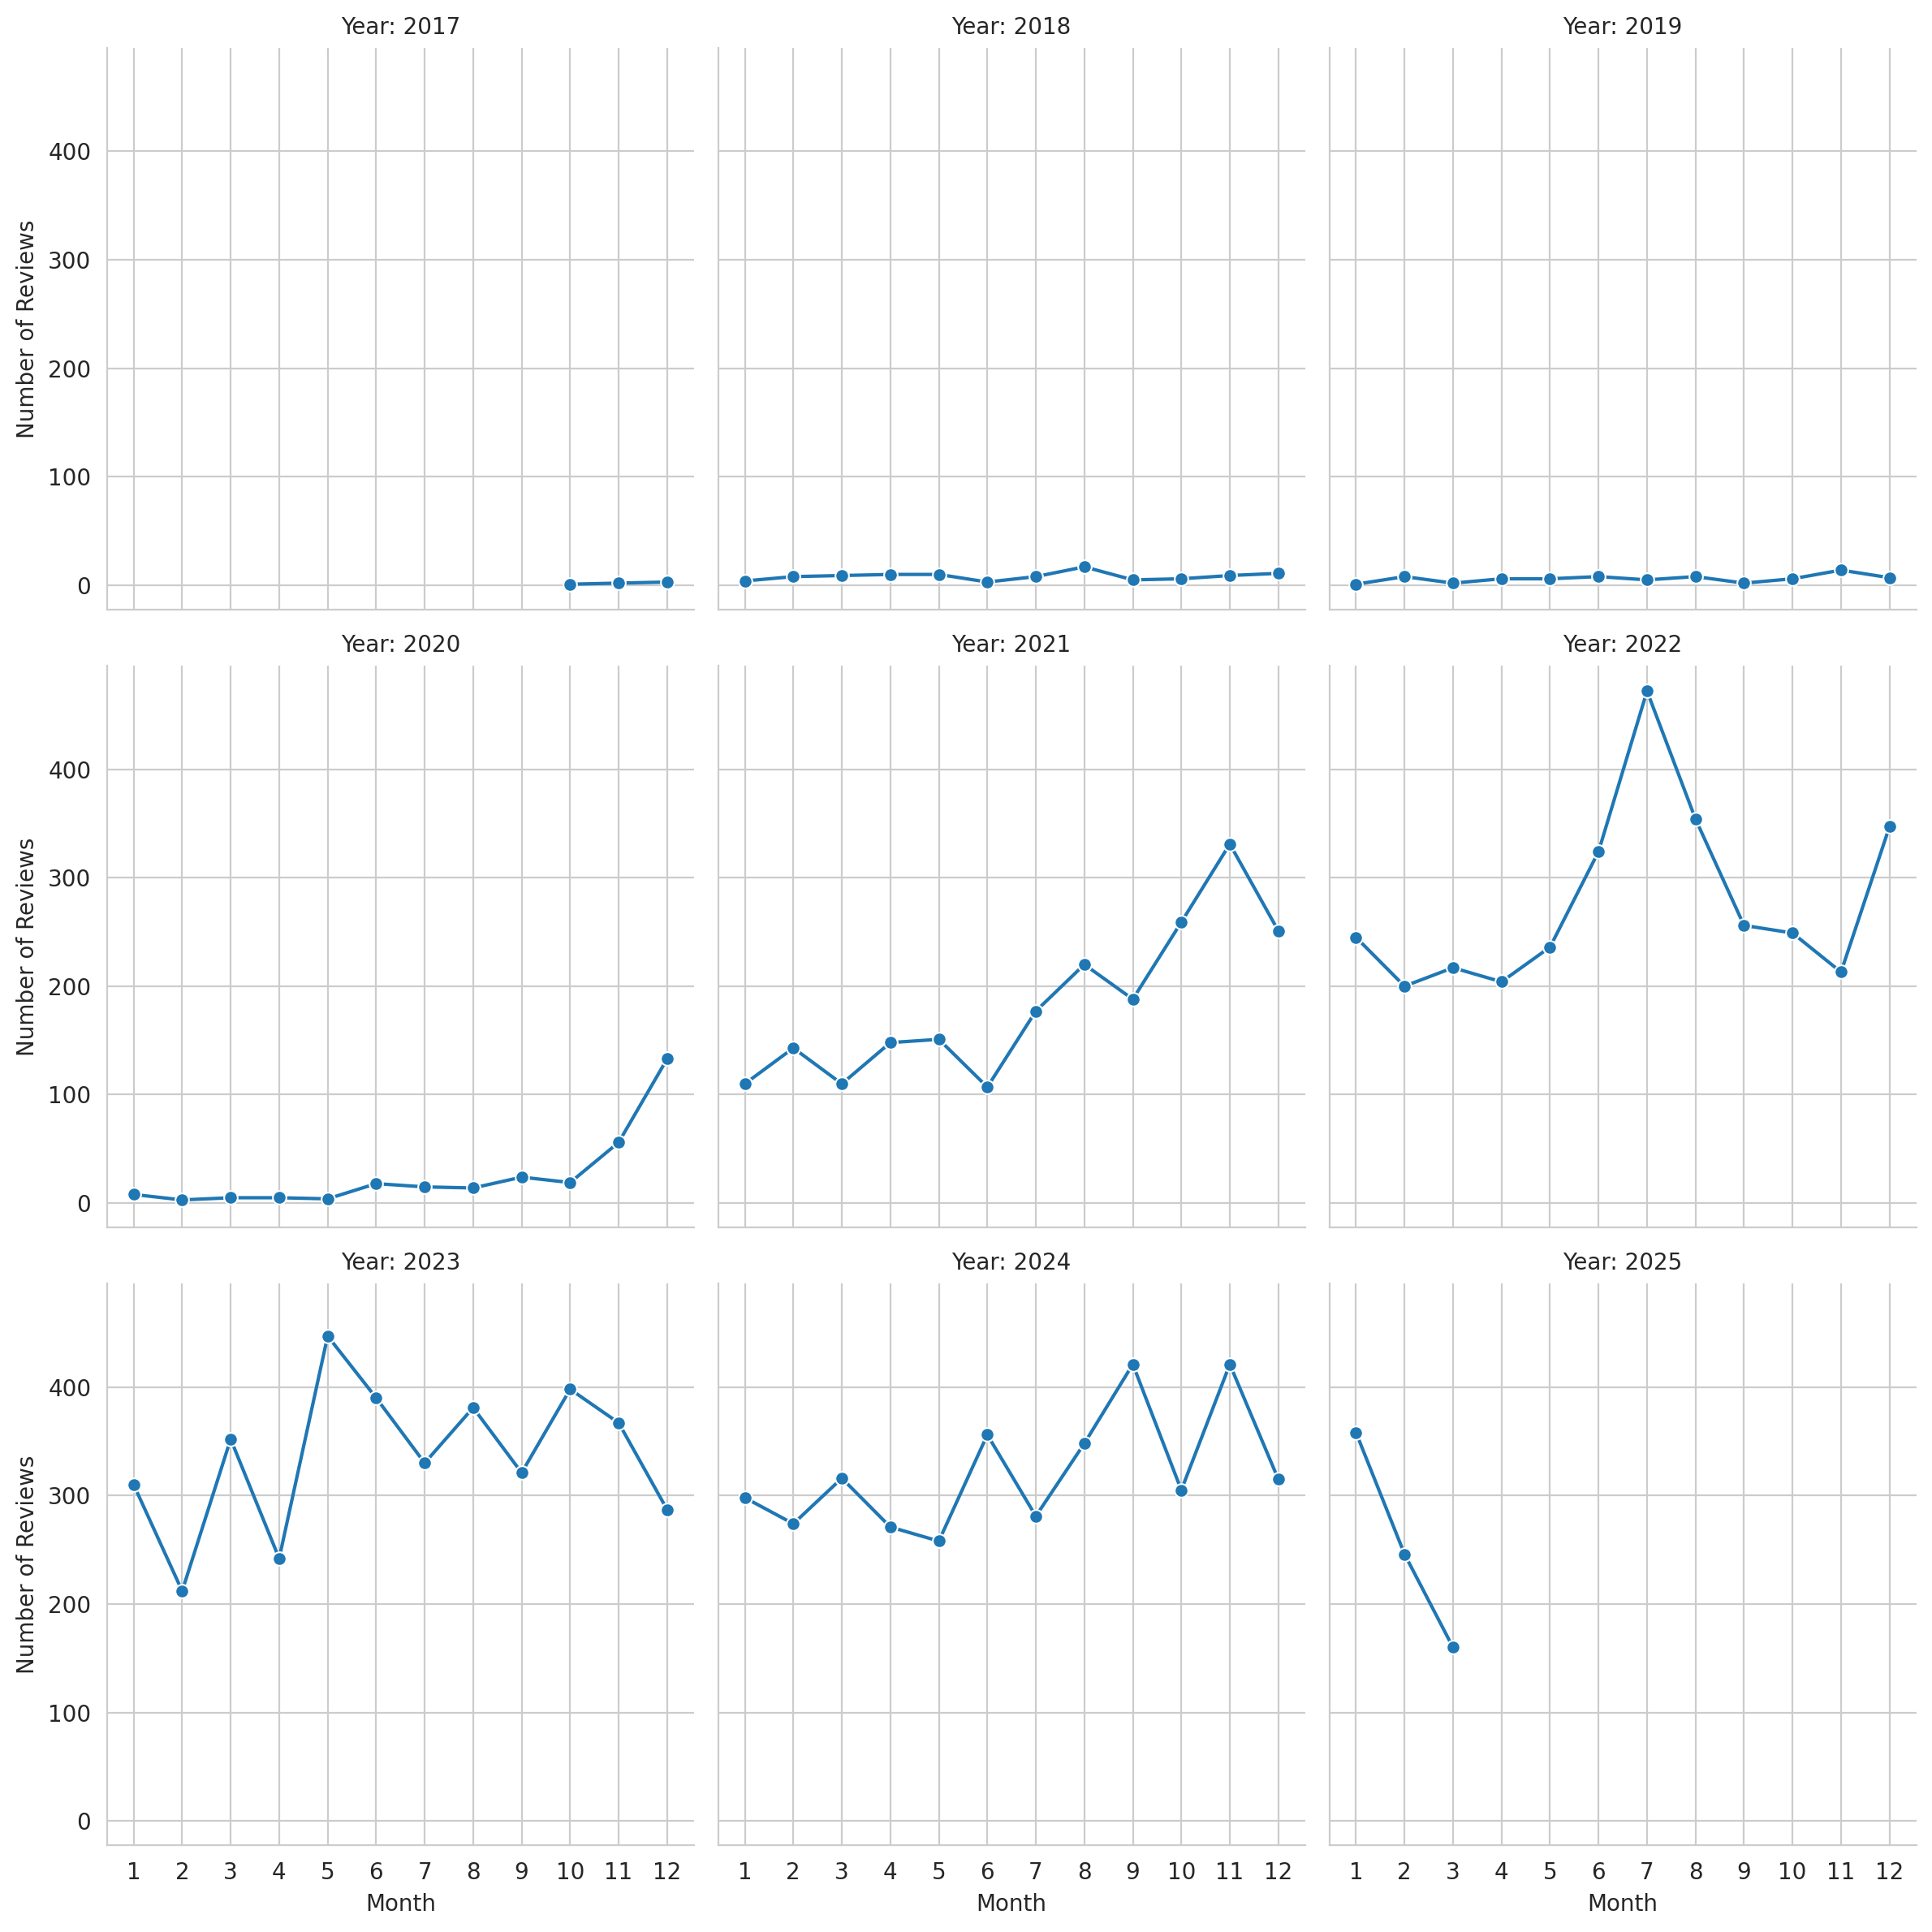

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ekstrak tahun dan bulan
df_gfrev2['year'] = df_gfrev2['at'].dt.year
df_gfrev2['month'] = df_gfrev2['at'].dt.month

# Group by year and month and count reviews
reviews_per_month = df_gfrev2.groupby(['year', 'month'])['id'].count().reset_index()

# Buat grid plot dengan FacetGrid
g = sns.FacetGrid(reviews_per_month, col='year', col_wrap=3, height=4, sharey=True)
g.map(sns.lineplot, 'month', 'id', marker='o')

# Tambahkan judul & label
g.set_axis_labels("Month", "Number of Reviews")
g.set_titles("Year: {col_name}")
plt.xticks(range(1, 13))  # Pastikan semua bulan muncul

plt.show()


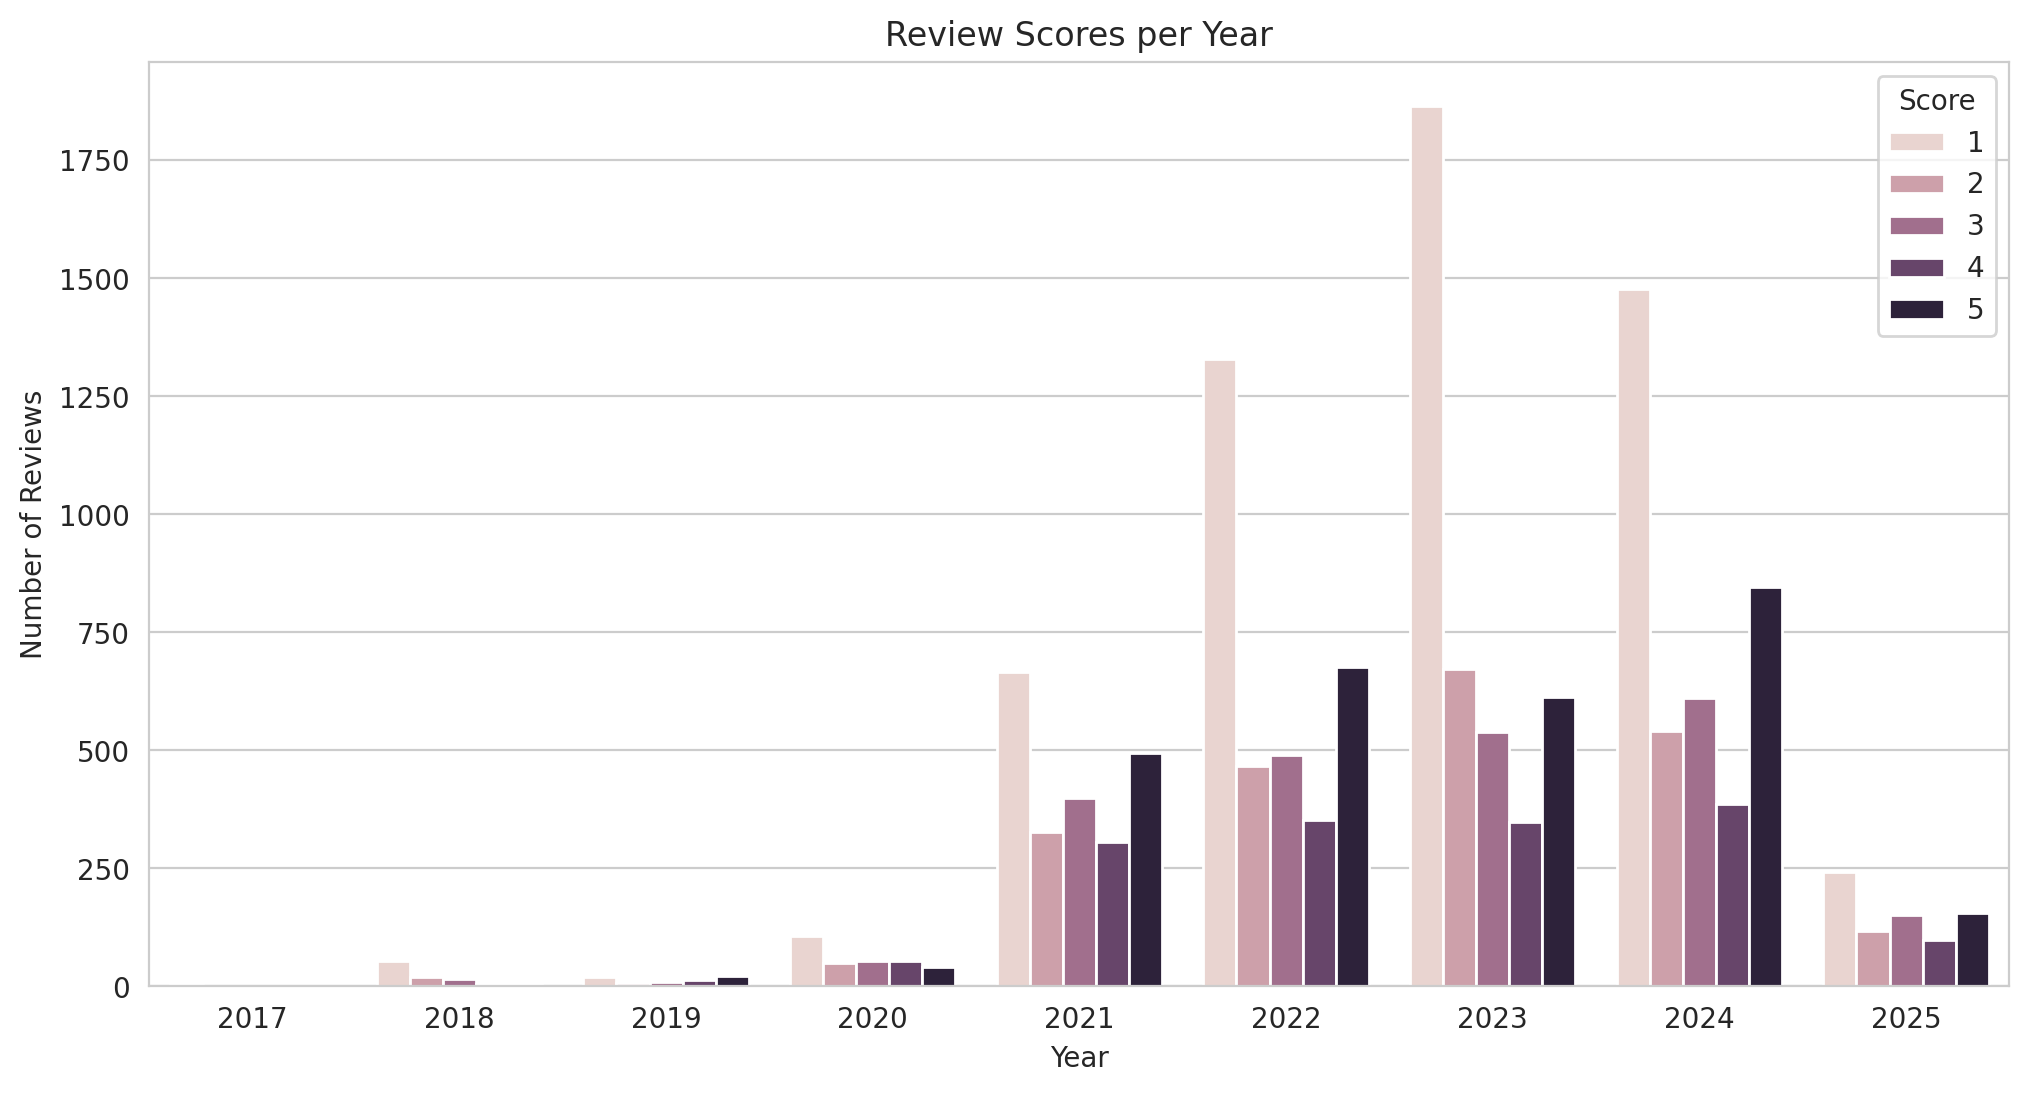

score     1    2    3    4    5
year                           
2017      3    1    2    0    0
2018     53   20   16    6    5
2019     20    7   10   13   23
2020    106   50   53   53   42
2021    667  327  400  306  495
2022   1330  467  490  353  677
2023   1864  672  538  349  614
2024   1477  542  612  386  847
2025    242  117  151   98  156

In [ ]:
# prompt: count for each score per year with bar chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_gfrev is your DataFrame and it's already loaded
# ... (your existing code to load and process df_gfrev)

# Convert 'at' column to datetime objects
df_gfrev['at'] = pd.to_datetime(df_gfrev['at'])

# Create a 'year' column from the 'at' column
df_gfrev['year'] = df_gfrev['at'].dt.year

# Group data by year and score, then count occurrences
score_per_year = df_gfrev.groupby(['year', 'score'])['id'].count().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='id', hue='score', data=score_per_year)
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Review Scores per Year')
plt.legend(title='Score')
plt.show()

# Assuming df_gfrev is your DataFrame and it has 'year' and 'score' columns
score_per_year = df_gfrev.groupby('year')['score'].value_counts().unstack(fill_value=0)
score_per_year

## Wordcloud

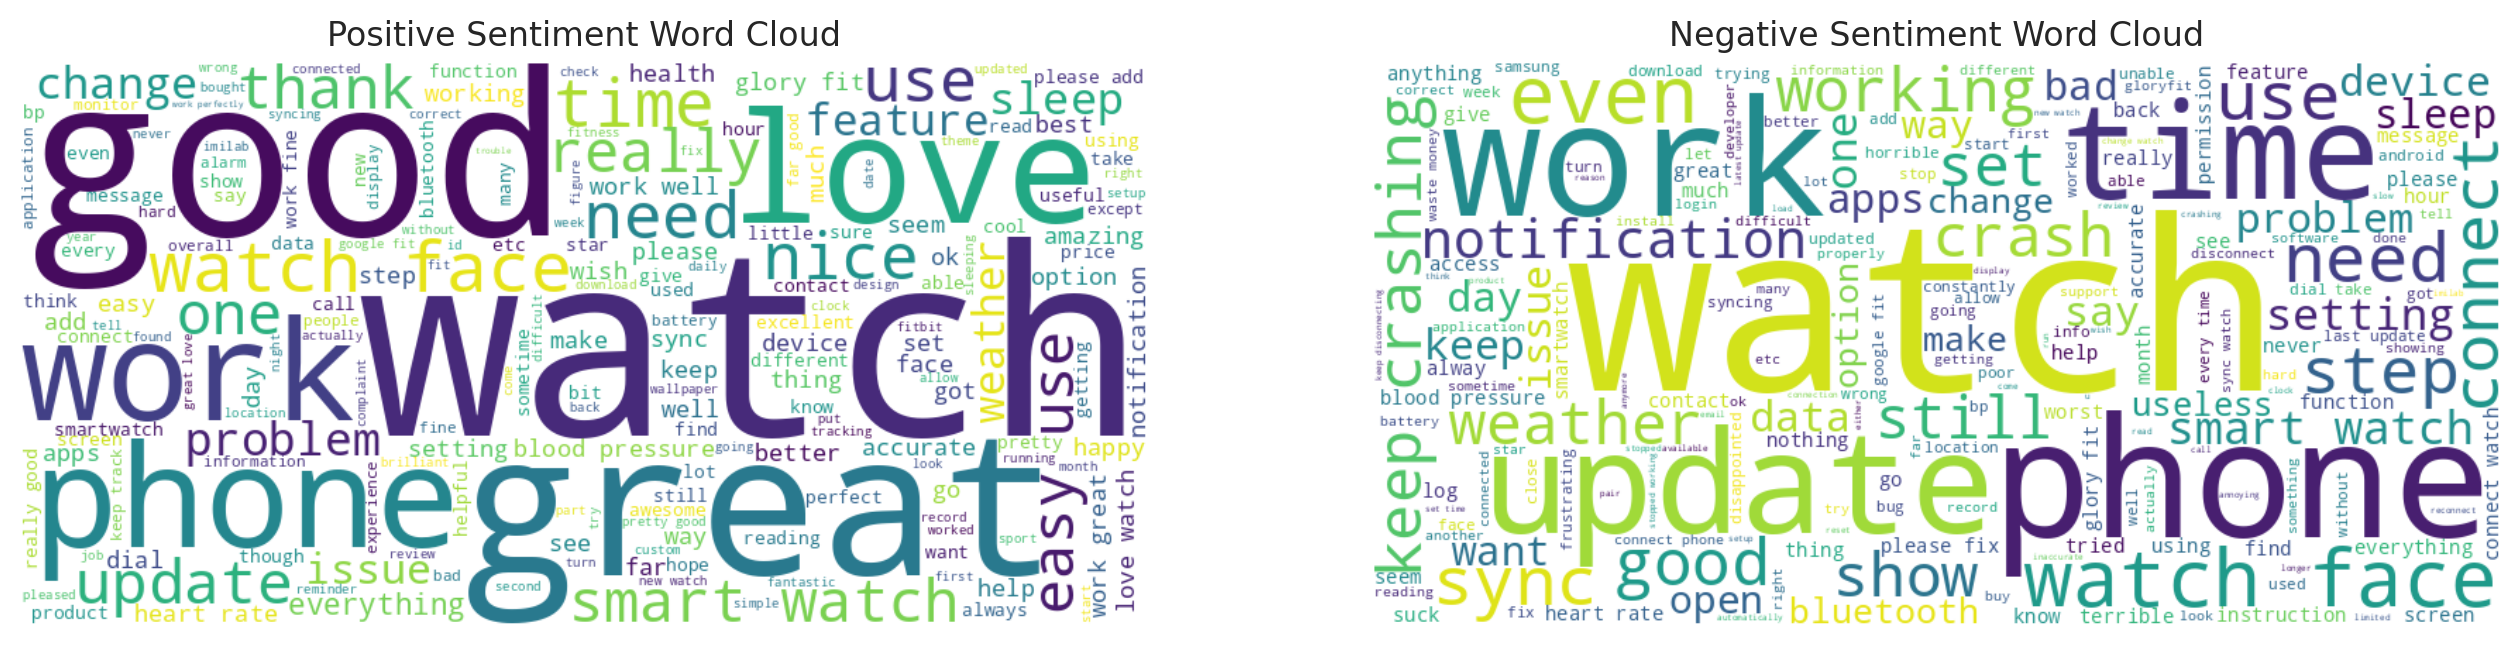

In [ ]:
# prompt: make a wordcloud for negative sentiment and positive sentiment

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df_gfrev is your DataFrame and 'cleaned_content' and 'sentiment_rating' columns exist

# Separate positive and negative reviews
positive_reviews = df_gfrev[df_gfrev['sentiment_rating'] == 'Positive']['cleaned_content']
negative_reviews = df_gfrev[df_gfrev['sentiment_rating'] == 'Negative']['cleaned_content']

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")

plt.show()
